<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/ABC_Loan_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Company**

ABC is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at ABC is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

ABC deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

**Data dictionary:**
1. loan_amnt : The listed amount of the loan applied for by the
borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
2. term : The number of payments on the loan. Values are in months and can be either 36 or 60.
3. int_rate : Interest Rate on the loan
4. installment : The monthly payment owed by the borrower if the loan originates.
5. grade : LoanTap assigned loan grade
6. sub_grade : LoanTap assigned loan subgrade
7. emp_title :The job title supplied by the Borrower when applying for the loan.*
8. emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9. home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
10. annual_inc : The self-reported annual income provided by the borrower during registration.
11. verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
12. issue_d : The month which the loan was funded
13. loan_status : Current status of the loan - Target Variable
14. purpose : A category provided by the borrower for the loan request.
15. title : The loan title provided by the borrower
16. dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
17. earliest_cr_line :The month the borrower's earliest reported credit line was opened
18. open_acc : The number of open credit lines in the borrower's credit file.
19. pub_rec : Number of derogatory public records
20. revol_bal : Total credit revolving balance
21. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
22. total_acc : The total number of credit lines currently in the borrower's credit file
23. initial_list_status : The initial listing status of the loan. Possible values are – W, F
24. application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
25. mort_acc : Number of mortgage accounts.
26. pub_rec_bankruptcies : Number of public record bankruptcies
27. Address: Address of the individual

In [473]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:00<00:00, 142MB/s] 


In [474]:
#Loading Dataset
df = pd.read_csv('logistic_regression.csv')

In [475]:
pd.set_option('display.max_columns',None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [476]:
df.shape

(396030, 27)

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [478]:
# checking duplicates
df.duplicated().sum()

0

In [479]:
df.duplicated(subset='address').sum()

2330

In [480]:
# Getting series of all columns with their null values
res = df.isna().sum()
res = res[res>0]
res

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [481]:
df.select_dtypes(include='object').nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              173105
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   115
loan_status                 2
purpose                    14
title                   48816
earliest_cr_line          684
initial_list_status         2
application_type            3
address                393700
dtype: int64

**Insight:**
1. purpose and title seems to be similar,need to investigate
2. address needs to be split
3. issue_d and earliest_cr_line need to be converted to datetime values
4. There are null values in emp_title,emp_length,title,revol_util,mort_acc,pub_rec_bankruptcies
5. Duplicate addresses needs to be investigated
6. Following columns need to be coverted to category type:
term, grade, sub_grade, emp_length, home_ownership, verification_status, loan_status,purpose, initial_list_status, application_type

In [482]:
df['purpose'].value_counts(normalize=True)*100

purpose
debt_consolidation    59.214453
credit_card           20.962806
home_improvement       6.067722
other                  5.349342
major_purchase         2.219529
small_business         1.439537
car                    1.186021
medical                1.059516
moving                 0.720652
vacation               0.619145
house                  0.555766
wedding                0.457541
renewable_energy       0.083075
educational            0.064894
Name: proportion, dtype: float64

In [483]:
print('Unique Values: ',df['title'].nunique())
print(df['title'].value_counts(normalize=True)*100)

Unique Values:  48816
title
Debt consolidation            38.671584
Credit card refinancing       13.058685
Home improvement               3.871419
Other                          3.279445
Debt Consolidation             2.944145
                                ...    
Graduation/Travel Expenses     0.000254
Daughter's Wedding Bill        0.000254
gotta move                     0.000254
creditcardrefi                 0.000254
Toxic Debt Payoff              0.000254
Name: proportion, Length: 48816, dtype: float64


There are repeat titles with only difference in case thus need to correct them.

In [484]:
df['title']=df['title'].str.lower()

In [485]:
print('Unique Values: ',df['title'].nunique())
print(df['title'].value_counts(normalize=True)*100)

Unique Values:  41327
title
debt consolidation                   42.637354
credit card refinancing              13.133253
home improvement                      4.341397
other                                 3.295424
consolidation                         1.416020
                                       ...    
sweet                                 0.000254
mortgage convertion                   0.000254
debt consolidation and relocation     0.000254
1 payment loan plan                   0.000254
toxic debt payoff                     0.000254
Name: proportion, Length: 41327, dtype: float64


We should consider column 'purpose' as it is properly categorized for investigation

In [486]:
# investigating for discrepancies
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts(normalize=True)*100)
    print()

term
 36 months    76.258112
 60 months    23.741888
Name: proportion, dtype: float64

grade
B    29.295255
C    26.762366
A    16.207611
D    16.040199
E     7.950913
F     2.972502
G     0.771154
Name: proportion, dtype: float64

sub_grade
B3    6.730551
B4    6.464409
C1    5.974800
C2    5.701588
B2    5.680125
B5    5.576598
C3    5.358432
C4    5.120824
B1    4.843572
A5    4.677928
C5    4.606722
D1    4.038330
A4    3.986819
D2    3.522713
D3    3.086382
D4    2.943464
A3    2.670505
A1    2.456632
D5    2.449309
A2    2.415726
E1    1.999091
E2    1.876373
E3    1.567306
E4    1.353685
E5    1.154458
F1    0.892862
F2    0.698432
F3    0.577229
F4    0.451228
F5    0.352751
G1    0.267151
G2    0.190390
G3    0.139383
G4    0.094437
G5    0.079792
Name: proportion, dtype: float64

emp_title
Teacher                    1.176351
Manager                    1.139096
Registered Nurse           0.497450
RN                         0.494770
Supervisor                 0.490481
         

1. employee title and address needs to be coverted to lower case
2. 'ANY' category in home ownership can be combined with 'other'.

In [487]:
df['emp_title']=df['emp_title'].str.lower()
df['address']=df['address'].str.lower()
df['home_ownership']=df['home_ownership'].replace('ANY','OTHER')

In [488]:
df['home_ownership'].value_counts(normalize=True)*100

home_ownership
MORTGAGE    50.084085
RENT        40.347953
OWN          9.531096
OTHER        0.029038
NONE         0.007828
Name: proportion, dtype: float64

In [489]:
# splitting Address into city,state,zip_code
df['state']=df['address'].str.split(' ').apply(lambda x:x[-2].strip())
df['zip_code']=df['address'].str.split(' ').apply(lambda x:x[-1].strip())
df['city_state'] = df['address'].str.split('\n').apply(lambda x:x[1].replace(',','').strip())
df['city'] = df['city_state'].str.split(' ').apply(lambda x: (' '.join(x[:len(x)-2])).strip())
df.drop(columns='city_state',inplace=True)

In [490]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [491]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code,city
0,10000.0,36 months,11.44,329.48,B,B4,marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 michelle gateway\r\nmendozaberg, ok 22690",ok,22690,mendozaberg
1,8000.0,36 months,11.99,265.68,B,B5,credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 carney fort apt. 347\r\nloganmouth, sd 05113",sd,05113,loganmouth
2,15600.0,36 months,10.49,506.97,B,B3,statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 mark dale apt. 269\r\nnew sabrina, wv 05113",wv,05113,new sabrina
3,7200.0,36 months,6.49,220.65,A,A2,client advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 reid ford\r\ndelacruzside, ma 00813",ma,00813,delacruzside
4,24375.0,60 months,17.27,609.33,C,C5,destiny management inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,credit card refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 luna roads\r\ngreggshire, va 11650",va,11650,greggshire


In [492]:
# converting to required data type and splitting issue date
df['issue_d']=pd.to_datetime(df['issue_d'])
df['issue_month'] =df['issue_d'].dt.month
df['issue_year'] = df['issue_d'].dt.year
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','initial_list_status','application_type']
for i in cols:
    df[i]=df[i].astype('category')

<ipython-input-492-a1c15c863f2a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d']=pd.to_datetime(df['issue_d'])
<ipython-input-492-a1c15c863f2a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])


In [493]:
df[df.duplicated(subset='address')]['address'].value_counts()

address
usns johnson\r\nfpo ae 05113        7
uss johnson\r\nfpo ae 48052         7
uss smith\r\nfpo ap 70466           7
uscgc smith\r\nfpo ae 70466         7
usns johnson\r\nfpo ap 48052        6
                                   ..
usnv potter\r\nfpo ap 22690         1
usns barnes\r\nfpo ae 00813         1
uscgc pennington\r\nfpo ae 05113    1
uss watkins\r\nfpo ap 70466         1
usns rodriguez\r\nfpo aa 05113      1
Name: count, Length: 1716, dtype: int64

In [494]:
df[df['address']=='usns johnson\r\nfpo ae 05113']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code,city,issue_month,issue_year
3979,11200.0,36 months,10.75,365.35,B,B4,administration coordinator,9 years,OWN,68660.0,Verified,2016-02-01,Fully Paid,home_improvement,NaN,12.94,2000-09-01,7.0,0.0,7425.0,23.0,12.0,w,INDIVIDUAL,1.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,2,2016
46204,5000.0,36 months,11.67,165.29,B,B4,offshore captain,7 years,MORTGAGE,112000.0,Verified,2014-07-01,Fully Paid,credit_card,credit card refinancing,17.10,1995-07-01,22.0,0.0,8264.0,31.7,50.0,w,INDIVIDUAL,2.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,7,2014
56460,16000.0,36 months,13.11,539.96,B,B4,landmark protection,2 years,MORTGAGE,65000.0,Not Verified,2013-01-01,Fully Paid,debt_consolidation,bye bye debt,18.32,2003-07-01,14.0,0.0,29183.0,57.4,27.0,w,INDIVIDUAL,1.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,1,2013
78973,9700.0,36 months,8.39,305.72,A,A5,software analyst,10+ years,RENT,60000.0,Not Verified,2014-08-01,Fully Paid,debt_consolidation,debt consolidation,19.56,1996-11-01,9.0,0.0,9604.0,64.9,17.0,f,INDIVIDUAL,3.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,8,2014
101990,17500.0,36 months,18.99,641.40,E,E1,senior it instructor,9 years,RENT,140000.0,Source Verified,2014-06-01,Fully Paid,credit_card,credit card refinancing,17.19,1994-05-01,16.0,0.0,80236.0,94.8,28.0,f,INDIVIDUAL,1.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,6,2014
163081,18300.0,36 months,5.93,556.15,A,A1,engineering,8 years,MORTGAGE,114000.0,Verified,2015-03-01,Fully Paid,credit_card,credit card refinancing,21.69,1998-05-01,12.0,0.0,1745.0,2.7,20.0,f,INDIVIDUAL,3.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,3,2015
200919,27050.0,36 months,19.52,998.68,D,D4,technical sergeant,10+ years,MORTGAGE,64600.0,Verified,2013-11-01,Fully Paid,debt_consolidation,consolidation,32.12,2002-11-01,13.0,0.0,21390.0,79.5,30.0,f,INDIVIDUAL,2.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,11,2013
371946,21000.0,36 months,12.12,698.71,B,B3,segerdahl,10+ years,MORTGAGE,95000.0,Not Verified,2012-08-01,Fully Paid,credit_card,credit card refinancing,17.76,1992-02-01,16.0,0.0,22814.0,42.2,41.0,f,INDIVIDUAL,10.0,0.0,usns johnson\r\nfpo ae 05113,ae,05113,fpo,8,2012


No problem as addresses seems to be same but the individual can be different over period of time

In [495]:
df.describe().round(2)

,loan_amnt,int_rate,installment,annual_inc,issue_d,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,issue_month,issue_year
count,396030.00,396030.00,396030.00,396030.00,396030,396030.00,396030,396030.00,396030.00,396030.00,395754.00,396030.00,358235.00,395495.00,396030.00,396030.00
mean,14113.89,13.64,431.85,74203.18,2014-02-02 15:57:58.045602560,17.38,1998-05-03 09:34:15.062495488,11.31,0.18,15844.54,53.79,25.41,1.81,0.12,6.55,2013.63
min,500.00,5.32,16.08,0.00,2007-06-01 00:00:00,0.00,1944-01-01 00:00:00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00,2007.00
25%,8000.00,10.49,250.33,45000.00,2013-05-01 00:00:00,11.28,1994-10-01 00:00:00,8.00,0.00,6025.00,35.80,17.00,0.00,0.00,4.00,2013.00
50%,12000.00,13.33,375.43,64000.00,2014-04-01 00:00:00,16.91,1999-09-01 00:00:00,10.00,0.00,11181.00,54.80,24.00,1.00,0.00,7.00,2014.00
75%,20000.00,16.49,567.30,90000.00,2015-03-01 00:00:00,22.98,2003-04-01 00:00:00,14.00,0.00,19620.00,72.90,32.00,3.00,0.00,10.00,2015.00
max,40000.00,30.99,1533.81,8706582.00,2016-12-01 00:00:00,9999.00,2013-10-01 00:00:00,90.00,86.00,1743266.00,892.30,151.00,34.00,8.00,12.00,2016.00
std,8357.44,4.47,250.73,61637.62,NaN,18.02,NaN,5.14,0.53,20591.84,24.45,11.89,2.15,0.36,3.43,1.48


In [496]:
df.describe(include='category')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type
count,396030,396030,396030,377729,396030,396030,396030,396030,396030,396030
unique,2,7,35,11,5,3,2,14,2,3
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL
freq,302005,116018,26655,126041,198348,139563,318357,234507,238066,395319


In [497]:
df.describe(include='object')

,emp_title,title,address,state,zip_code,city
count,373103,394274,396030,396030,396030,396030
unique,154014,41327,393700,54,10,67513
top,manager,debt consolidation,uscgc smith\r\nfpo ae 70466,ap,70466,dpo
freq,5637,168108,8,14308,56985,14289


Insight:
1. outliers are present as seen by comparing max,median,min values, there is huge deviation in min,median,max values

In [498]:
 # Feature Engineering
# df['pub_rec_flag'] = df['pub_rec'].apply(lambda x: '0' if x==0 else ('1' if x==1 else '2+'))
# mort_max=df['mort_acc'].max()
# bins=[-1,0,1,2,3,4,mort_max]
# labels=['0','1','2','3','4','5+']
# df['mort_acc_flag'] =pd.cut(df['mort_acc'],bins=bins,labels=labels)

# **Univariate Analysis**

**Loan Amount**

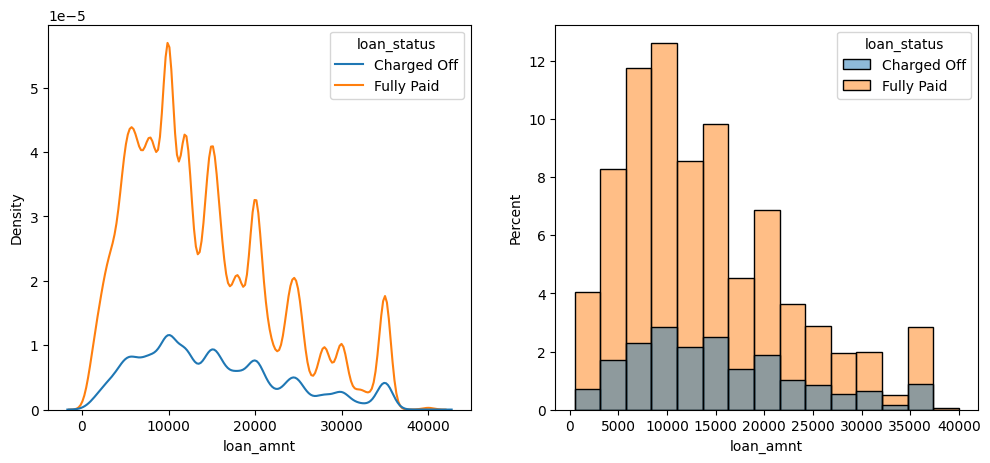

In [499]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='loan_amnt',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='loan_amnt',bins=15,hue='loan_status',stat='percent')
plt.show()

**Insight:**
1. Dist is right skewed and also there are spikes in data thus there are outliers.
2. Dist is similar in both loan status and with the amount the loan_status is also changing so loan_amnt is an important feature

In [500]:
# Spike Evaluation
df[(df['loan_amnt']>8000) & (df['loan_amnt']<20000)]['loan_amnt'].value_counts(ascending=False)

loan_amnt
10000.0    27668
12000.0    21366
15000.0    19903
16000.0    10129
18000.0     9195
           ...  
19525.0       17
14925.0       16
16725.0       16
19625.0       12
15525.0       12
Name: count, Length: 479, dtype: int64

In [501]:
df['loan_amnt'].value_counts(normalize=True)*100

loan_amnt
10000.0    6.986339
12000.0    5.395046
15000.0    5.025629
20000.0    4.789789
35000.0    3.680529
             ...   
36225.0    0.000253
950.0      0.000253
37800.0    0.000253
30050.0    0.000253
725.0      0.000253
Name: proportion, Length: 1397, dtype: float64

In [502]:
df[df['loan_amnt']>36000]['loan_amnt'].count()

211

**Insight:**

1. Now we know that these spikes are due to the fact that people tend to apply for loan amt likes 10000,15000,20000 and small spikes are of 9000, 12000 ,16000, 18000 amount.
2. Among them also the highest loan amount requested was of 10000 which comprises 7% of loan amounts and very few that is around 200 people took loan amount greater than 36000.

**Interest Rate**

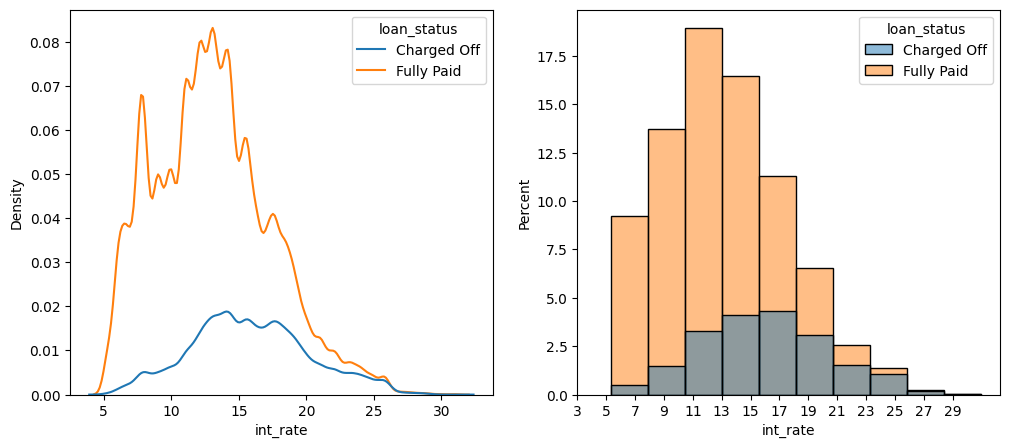

In [503]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='int_rate',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='int_rate',bins=10,hue='loan_status',stat='percent')
plt.xticks(np.arange(3,30,2))
plt.show()

In [504]:
# Major spike evaluation
df[(df['int_rate']>=10) & (df['int_rate']<=16)]['int_rate'].value_counts()

int_rate
10.99    12411
12.99     9632
15.61     9350
11.99     8582
12.12     7358
         ...  
14.28        1
14.67        1
14.70        1
14.62        1
14.38        1
Name: count, Length: 222, dtype: int64

In [505]:
# Mini spike evaluation
df[(df['int_rate']>=7) & (df['int_rate']<=10)]['int_rate'].value_counts()

int_rate
8.90    8019
7.90    7332
9.17    6108
9.99    5248
7.62    4839
        ... 
9.83       7
9.01       7
9.51       5
9.70       5
7.42       4
Name: count, Length: 70, dtype: int64

In [506]:
(df[(df['int_rate']>=10) & (df['int_rate']<=16)]['int_rate'].count())/df.shape[0]*100

49.198798070853215

In [507]:
(df[(df['int_rate']>=22)]['int_rate'].value_counts().sum())/df.shape[0]*100

4.446380324722875

**Insight:**
1. Right Skewed Normal Dist.
2. Most of the interest rate lies in between 11-16% that makes up 50% of the interest offered.
3. Very few that is only 5 % of interest rate are more than 22%
4. Full paid loan status is changing with interest rate so interest rate is also an important feature

**Installment**

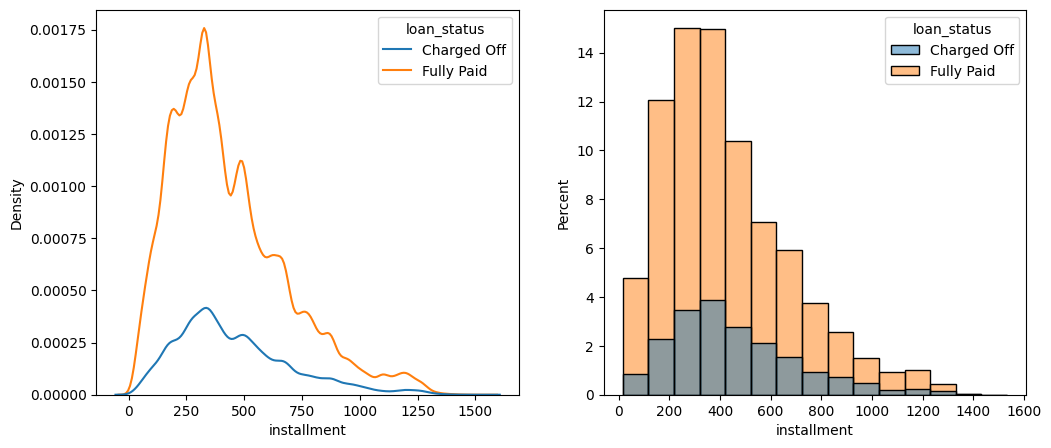

In [508]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='installment',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='installment',bins=15,hue='loan_status',stat='percent')
plt.show()

In [509]:
(df[(df['installment']>=200) & (df['installment']<=400)]['installment'].value_counts().sum())/df.shape[0]*100

37.31964750145191

**Insight:**
1. Right Skewed Normal Dist
2. Most monthly installment lies in range 200-400 rs and makes up 37 % of the total monthly instalments offered.
3. Full paid loan status is changing with installment rate so installment is also an important feature

**Annual Income**

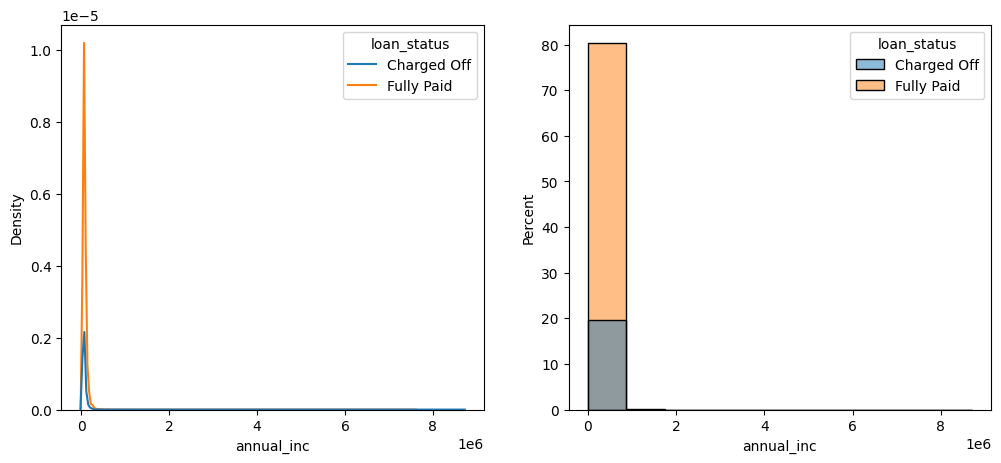

In [510]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='annual_inc',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='annual_inc',bins=10,hue='loan_status',stat='percent')
plt.show()

In [511]:
annual_max=df['annual_inc'].max()
df['annual_inc_flag']=pd.DataFrame(pd.cut(df['annual_inc'],bins=[-1,25000,50000,75000,100000,125000,150000,annual_max],labels=['0-25k','26-50k','51k-75k','76k-100k','101k-125k','126k-150k','150k+']))

In [512]:
print(annual_max)

8706582.0


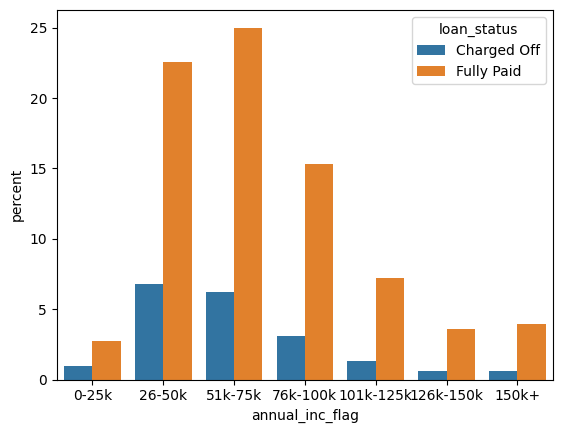

In [513]:
sns.countplot(data=df,x='annual_inc_flag',stat='percent',hue='loan_status')
plt.show()

**Insight**:

1. Huge no of outliers
2. Around 60% of the income lies in range 26k - 75k and 20 % in range 76k-100k
and 5% in range of 150k+
3. Annual income is also important feature

**Debt to income ratio**

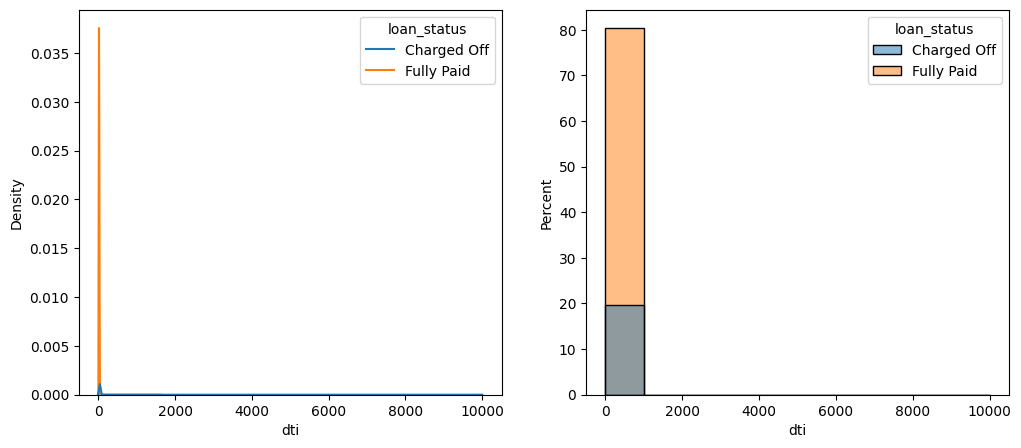

In [514]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='dti',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='dti',bins=10,hue='loan_status',stat='percent')
plt.show()

In [515]:
dti_max = df['dti'].max()
dti_min=df['dti'].min()
df['dti_flag'] = pd.DataFrame(pd.cut(df['dti'],bins=[dti_min,10,20,30,40,dti_max],labels=['0-10','10-20','20-30','30-40','40+']))

In [516]:
print(dti_min)
print(dti_max)

0.0
9999.0


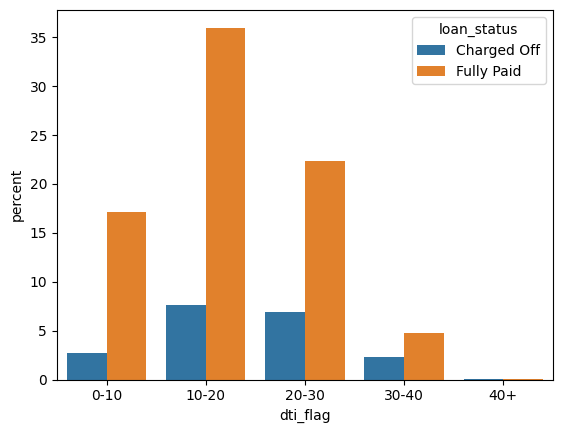

In [517]:
sns.countplot(data=df,x='dti_flag',stat='percent',hue='loan_status')
plt.show()

**Insight:**
1. There are following percentage of individuals having dti:
        0-10 - 20%
        10-20 - 45%
        20-30 - 30%
2. Very few dti is greater than 40
3. Huge no of outliers
4. dti is also important feature


**open accounts**

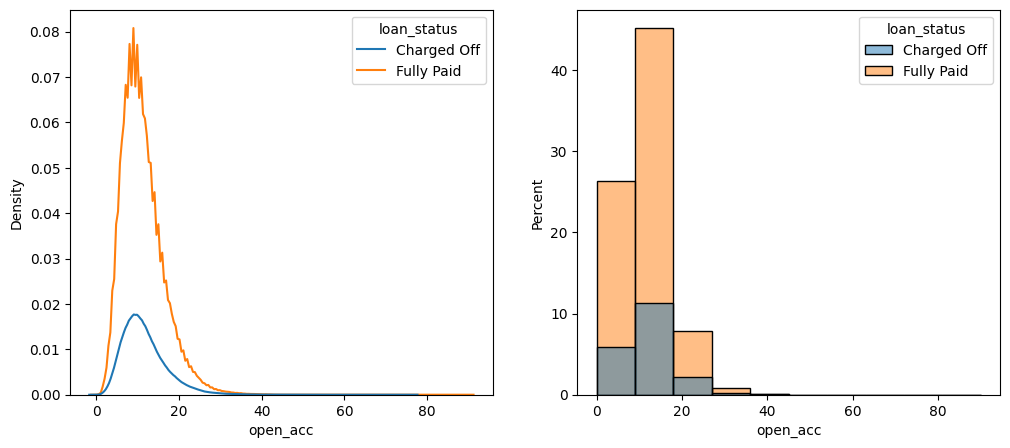

In [518]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='open_acc',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='open_acc',bins=10,stat='percent',hue='loan_status')
plt.show()

**Insight:**
1. Right skewed Normal Dist
2. 60 % of individual with open_acc in between 10-20
3. open account is also important feature

**Revolving Balance**

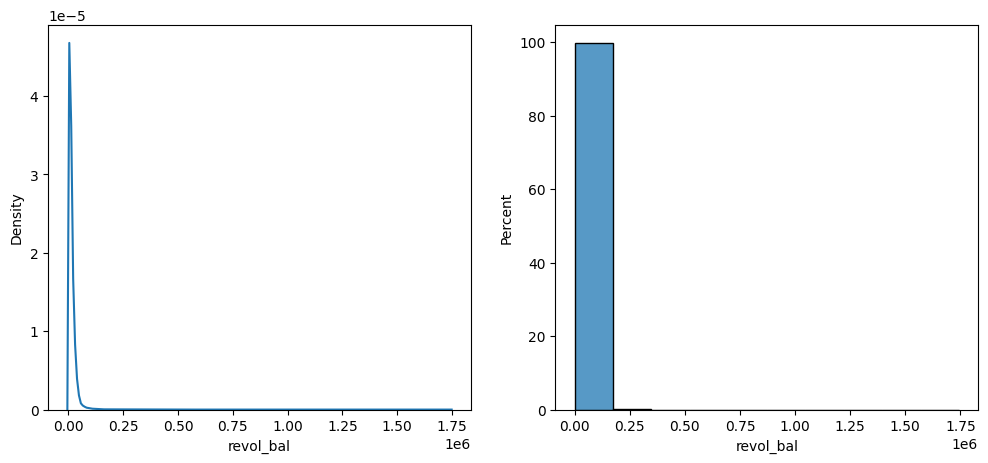

In [519]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='revol_bal')
plt.subplot(1,2,2)
sns.histplot(data=df,x='revol_bal',bins=10,stat='percent')
plt.show()

**Insight:**
1. Huge no of outliers

**Total no of accounts**

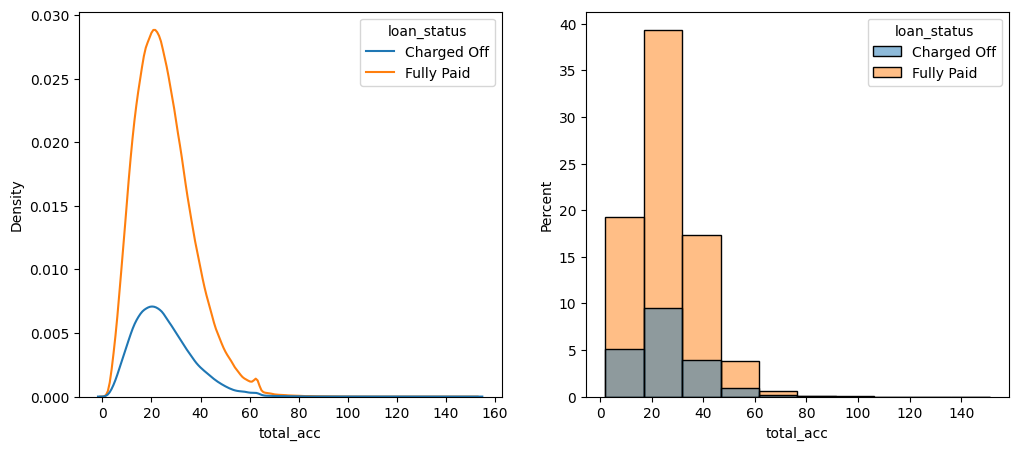

In [520]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='total_acc',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='total_acc',bins=10,hue='loan_status',stat='percent')
plt.show()

In [521]:
df[(df['total_acc']>=16) & (df['total_acc']<=30)]['total_acc'].count()/df.shape[0]*100

49.58083983536601

Insight:
1. Right skewed normal dist
2. There are outliers
3. Most of the total accounts lies in range of 16-30 and makes up 50% of the total accounts  while only 5% are above 50
4. total_acc is also important feature

**Revol utilization rate**

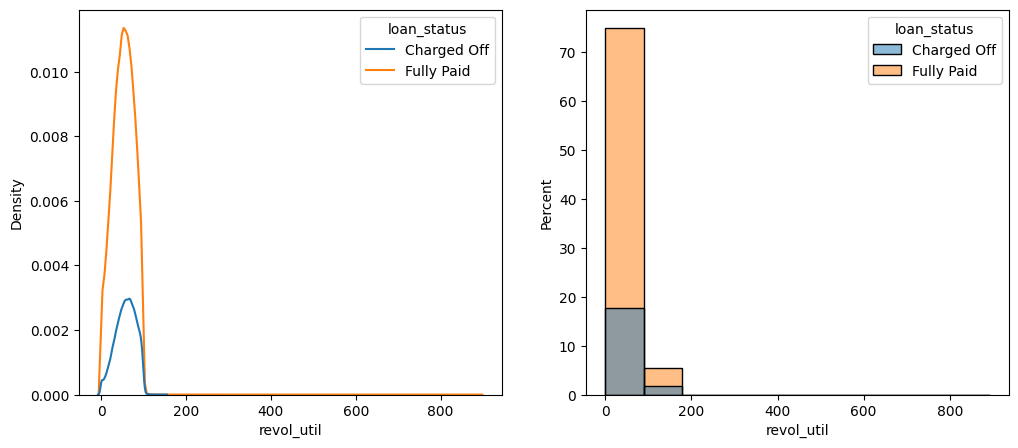

In [522]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='revol_util',hue='loan_status')
plt.subplot(1,2,2)
sns.histplot(data=df,x='revol_util',bins=10,hue='loan_status',stat='percent')
plt.show()

In [523]:
df[df['revol_util']<=90]['revol_util'].count()/df.shape[0]*100

93.37676438653637

Insight:
1. Right Skewed Normal Dist
2. Most of the revol utilization rate lie between 0-90 and makes up the 93% of the data

**Public Derogatory Records**

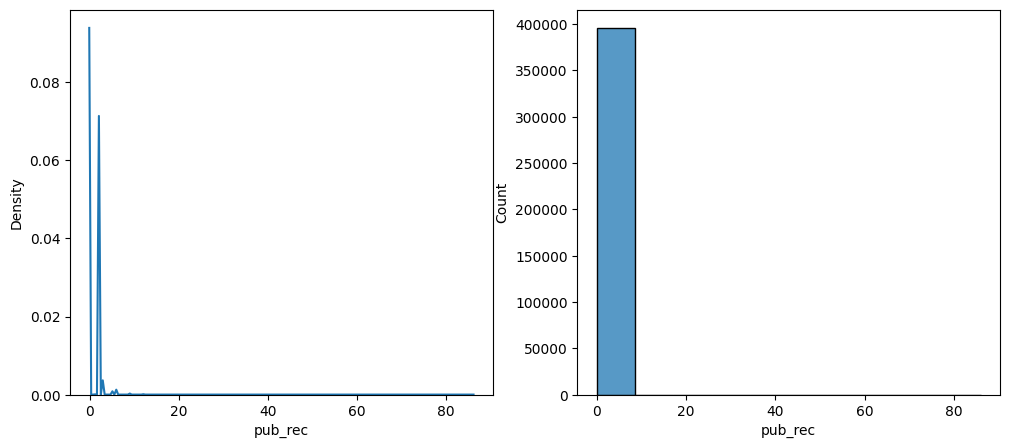

In [524]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='pub_rec')
plt.subplot(1,2,2)
sns.histplot(data=df,x='pub_rec',bins=10)
plt.show()

**public bankruptcies record**

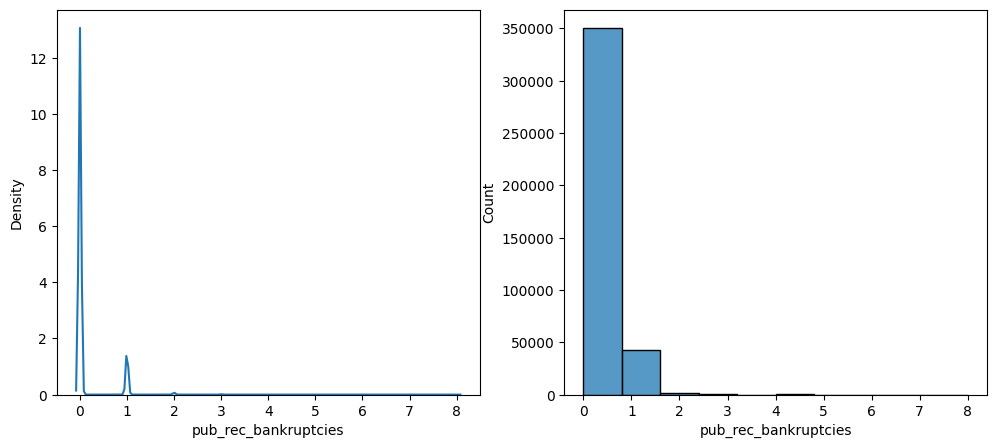

In [525]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='pub_rec_bankruptcies')
plt.subplot(1,2,2)
sns.histplot(data=df,x='pub_rec_bankruptcies',bins=10)
plt.show()

**Mortage Accounts**

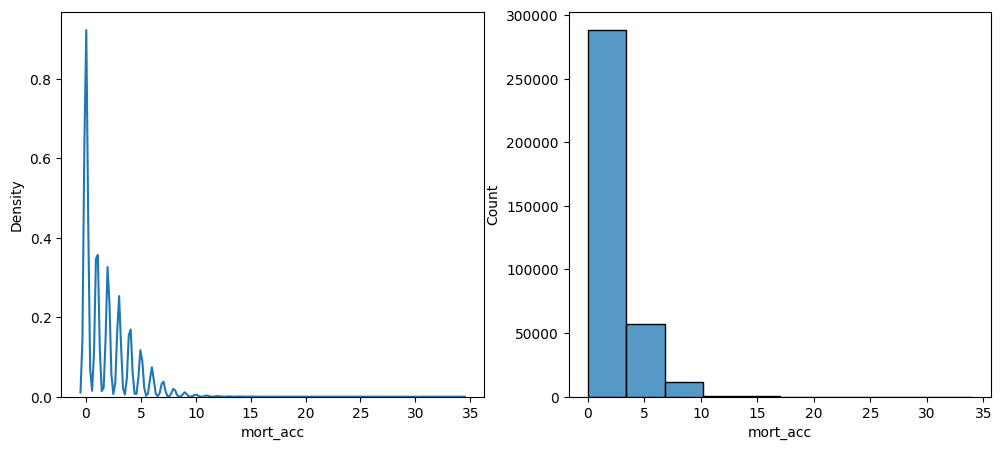

In [526]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.kdeplot(data=df,x='mort_acc')
plt.subplot(1,2,2)
sns.histplot(data=df,x='mort_acc',bins=10)
plt.show()

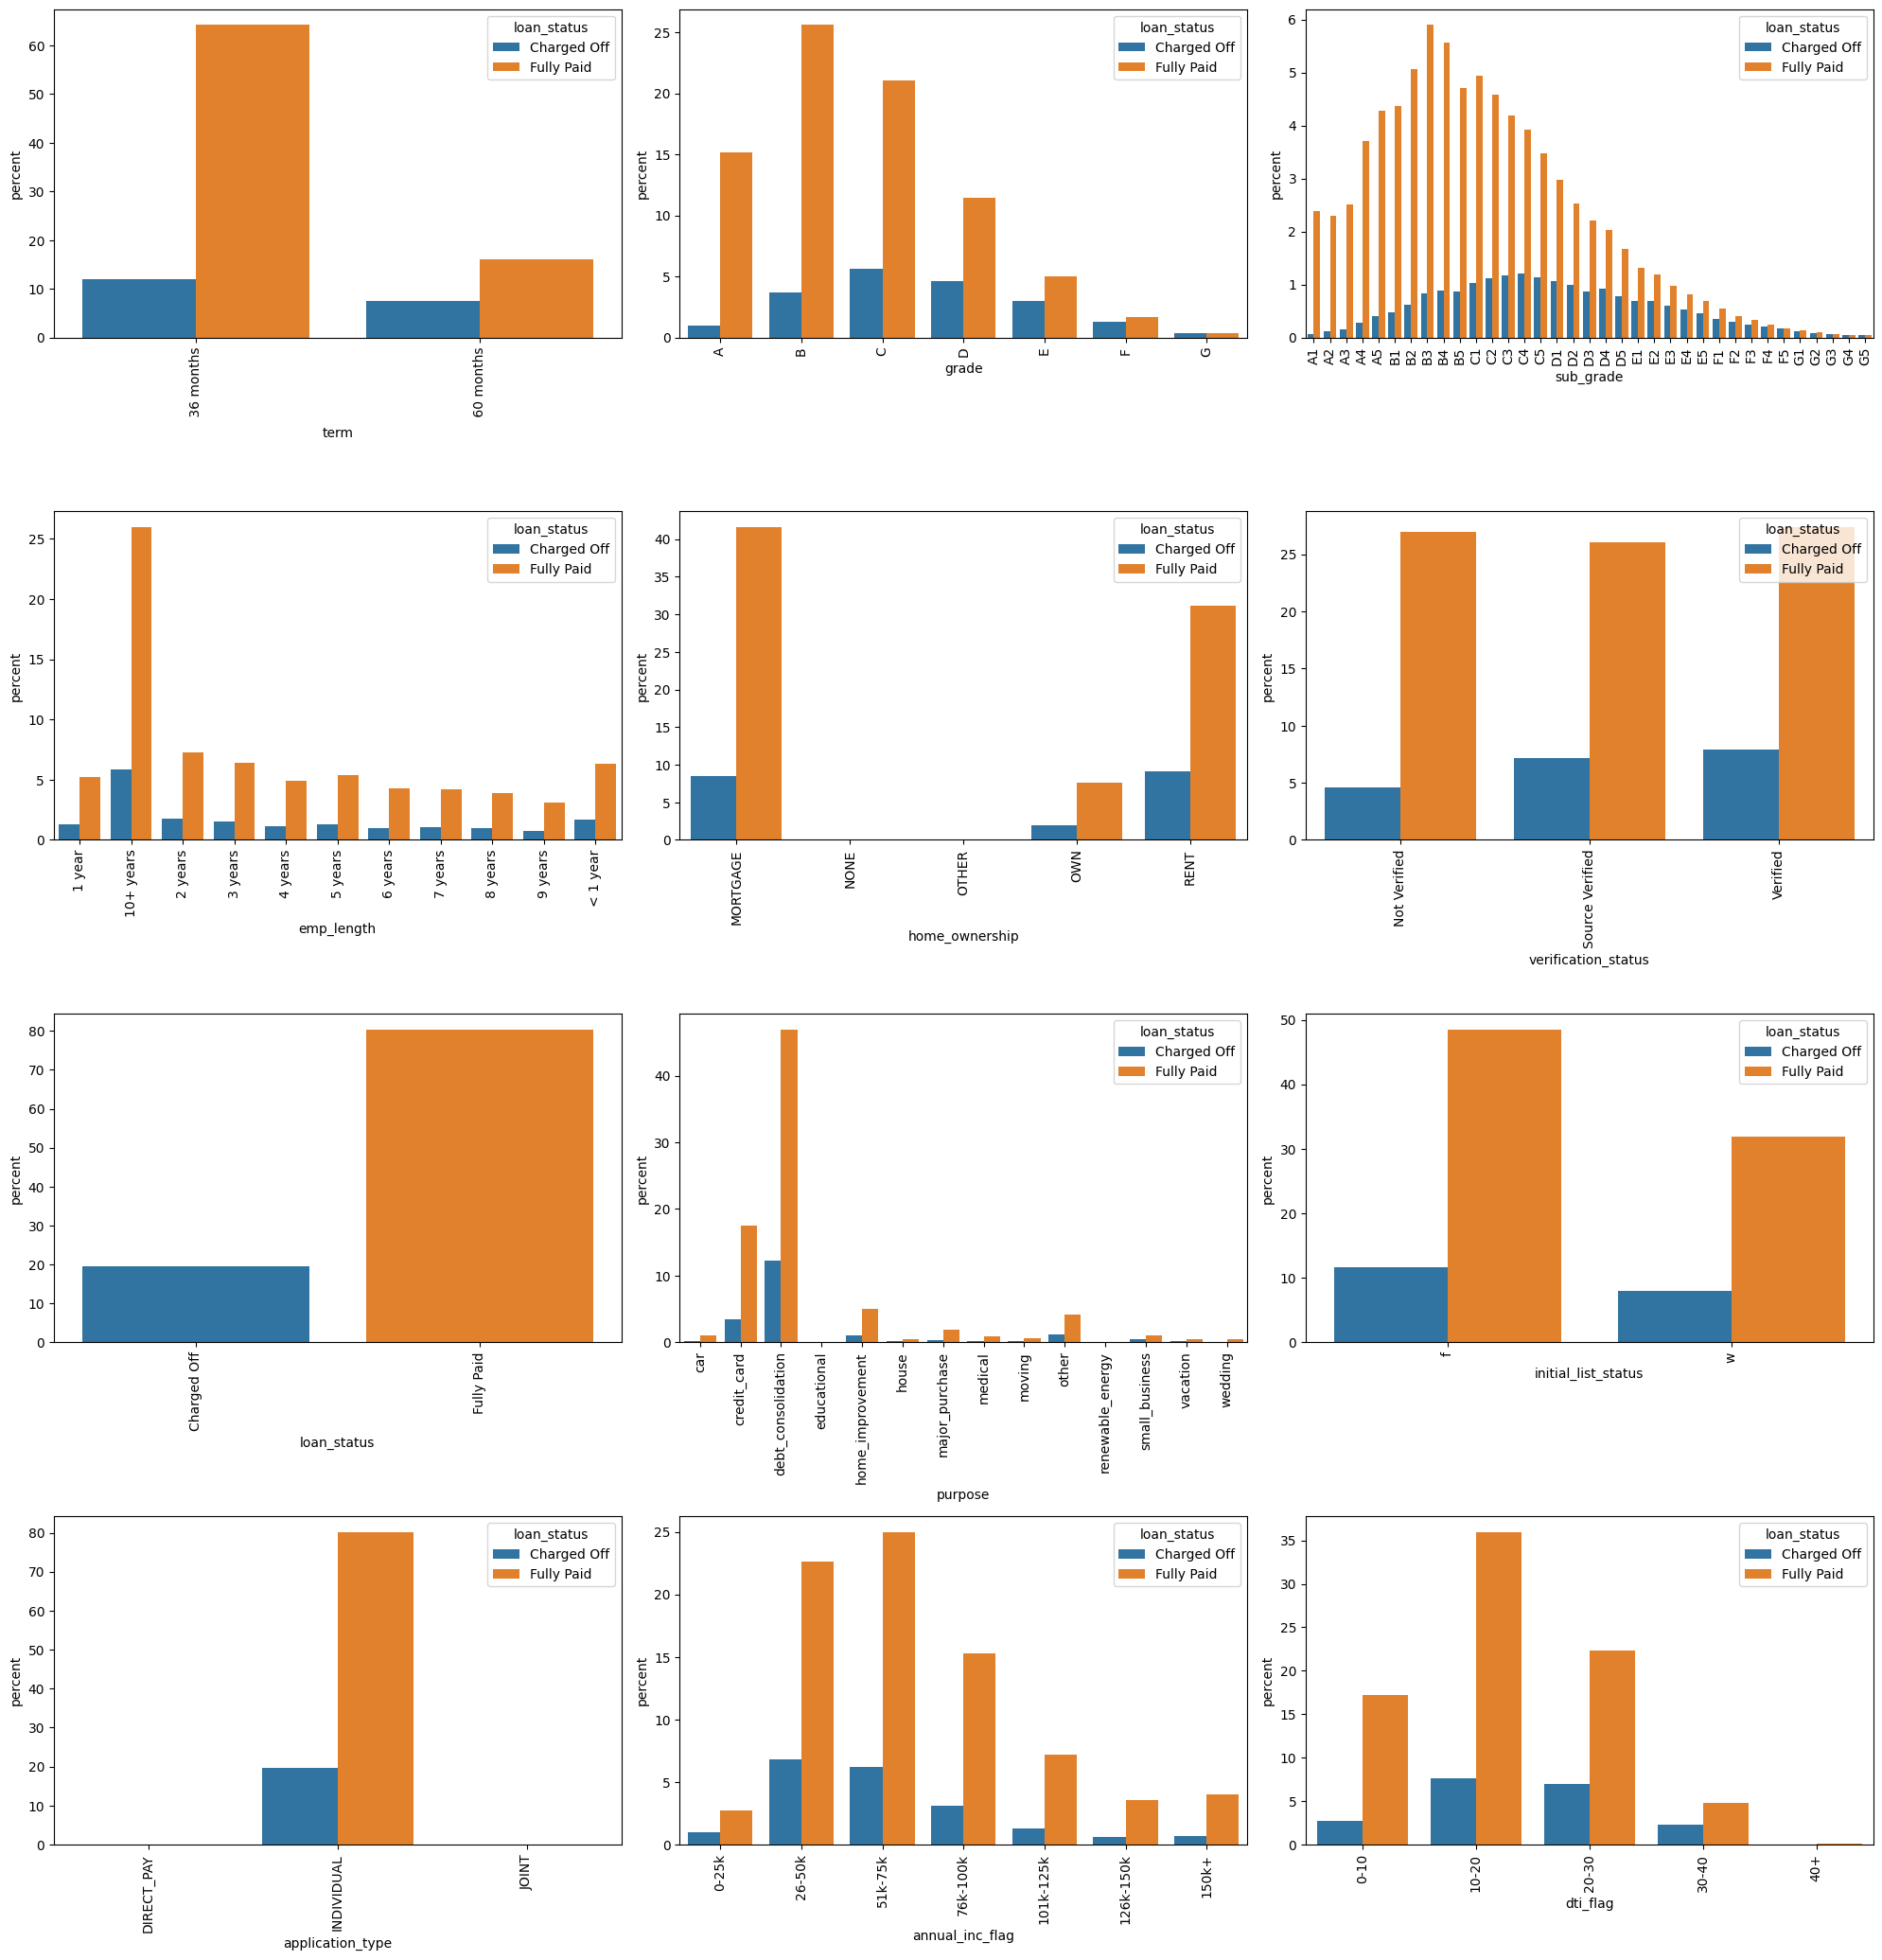

In [527]:
plt.figure(figsize=(20,25))
nrows = df.select_dtypes(include='category').shape[1]//3+1
ncols=3
k=1
for i in df.columns:
    if df[i].dtype=='category':
        plt.subplot(nrows,ncols,k)
        sns.countplot(data=df,x=i,stat='percent',hue='loan_status')
        plt.xticks(rotation=90)
        k=k+1
plt.tight_layout()
plt.show()

**Insight:**
1. 76 % of loans are of 36 months term.
2. Most loans grade are as follows:
        b - 29%
        c - 26%
        a - 16%

3. Emp length are as follows
        10+ - 33%
        2  - 9.5%

4. Home Ownership as follows
        MORTGAGE - 50%
        RENT     - 40%
        OWN      - 9.5%

5. Verification Status as:
        Verified           35%
        Source Verified    33%
        Not Verified       31%

6. Loan Status as follows:

        Fully Paid     80%
        Charged Off    19%

This indicates imbalance dataset,needs to balance later

7. Purpose as follows:

        debt_consolidation    59 %
        credit_card           21 %


8. initial_list_status
        f    60 %
        w    40 %

9. 99.8 % application Type is of INDIVIDUAL

10. verification status not important feature as loan status not changing with verification status

11. Application type is also not an important feature as 99 % are of individual type


In [528]:
state_grp = df.groupby(['state','zip_code']).aggregate({'loan_status':'count'}).sort_values(by=['state','loan_status'],ascending=[True,False]).reset_index()
state_grp.rename(columns=({'loan_status':'count'}),inplace=True)
state_grp.head(10)

,state,zip_code,count
0,aa,22690,2018
1,aa,30723,1994
2,aa,70466,1977
3,aa,48052,1918
4,aa,05113,1668
5,aa,00813,1624
6,aa,29597,1550
7,aa,93700,404
8,aa,11650,391
9,aa,86630,375


<Axes: xlabel='state', ylabel='percent'>

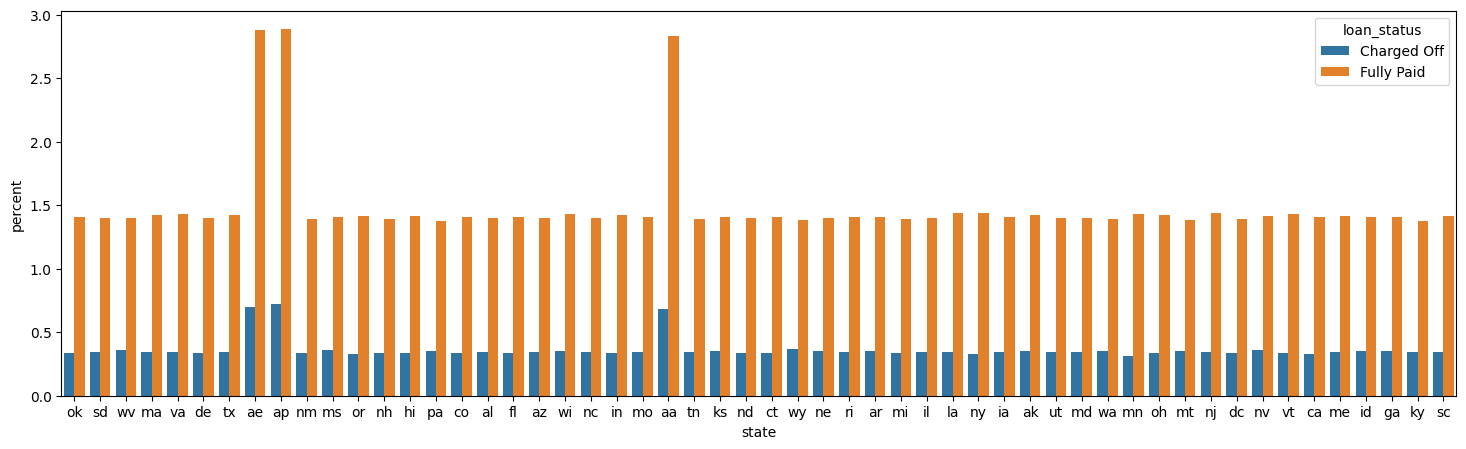

In [529]:
# Statewise distribution
plt.figure(figsize=(18,5))
sns.countplot(data=df,x='state',stat='percent',hue='loan_status')

In [530]:
# State & zip code together with min applications
state_zip_min =df.groupby('state')['zip_code'].agg(lambda x:x.value_counts().index[-1]).reset_index()
state_zip_min

,state,zip_code
0,aa,86630
1,ae,86630
2,ak,86630
3,al,93700
4,ap,86630
5,ar,86630
6,az,11650
7,ca,93700
8,co,86630
9,ct,93700


In [531]:
# State & zip code together with max applications
state_zip_max =df.groupby('state')['zip_code'].agg(lambda x:x.value_counts().index[0]).reset_index()
state_zip_max

,state,zip_code
0,aa,22690
1,ae,22690
2,ak,70466
3,al,70466
4,ap,70466
5,ar,22690
6,az,70466
7,ca,70466
8,co,70466
9,ct,22690


**Insight:**
1. Almost all state contributions are same except states - ae,ap,aa
2. Loan Status is not affected by state so not an important feature

# **Bivariate Analysis**

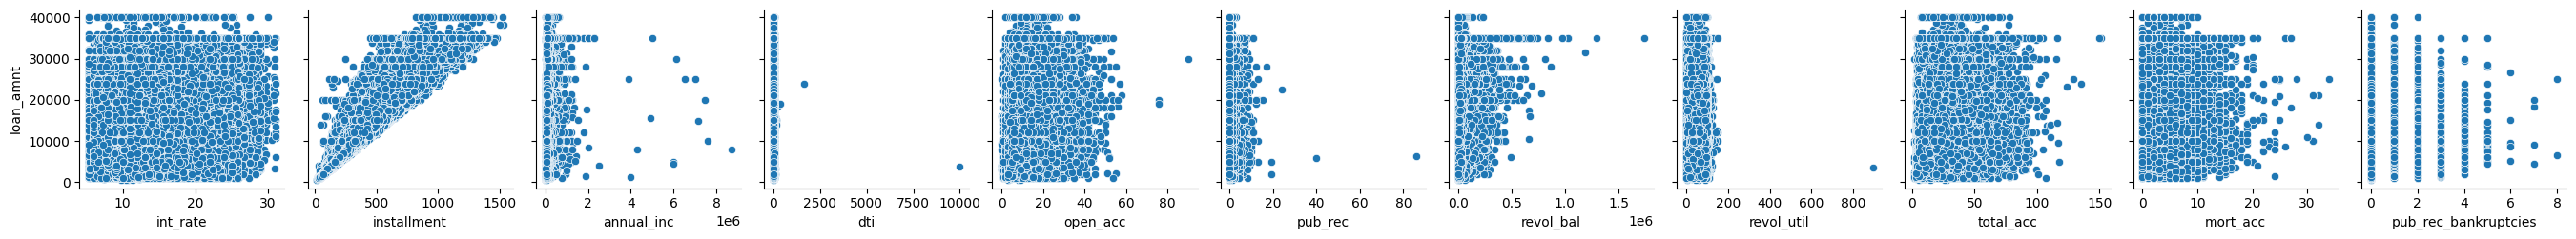

In [532]:
cols=df.select_dtypes(include='number').columns.values
cols=cols[(cols!='issue_month')&(cols!='issue_year') & (cols!='loan_amnt')]
sns.pairplot(data=df,y_vars=['loan_amnt'],x_vars=cols)

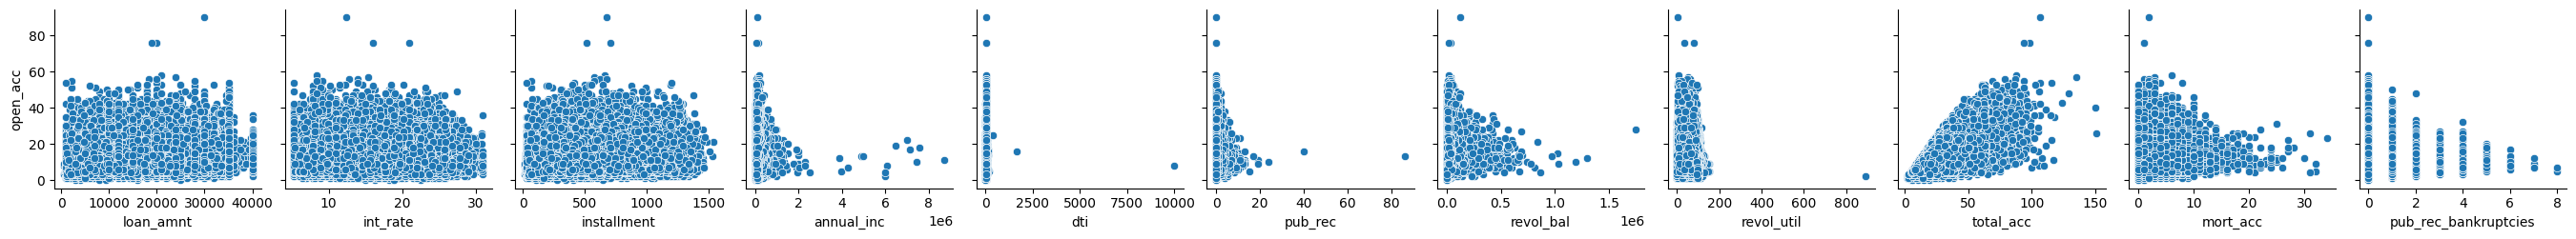

In [533]:
cols=df.select_dtypes(include='number').columns.values
cols=cols[(cols!='issue_month')&(cols!='issue_year') & (cols!='open_acc')]
sns.pairplot(data=df,y_vars=['open_acc'],x_vars=cols)

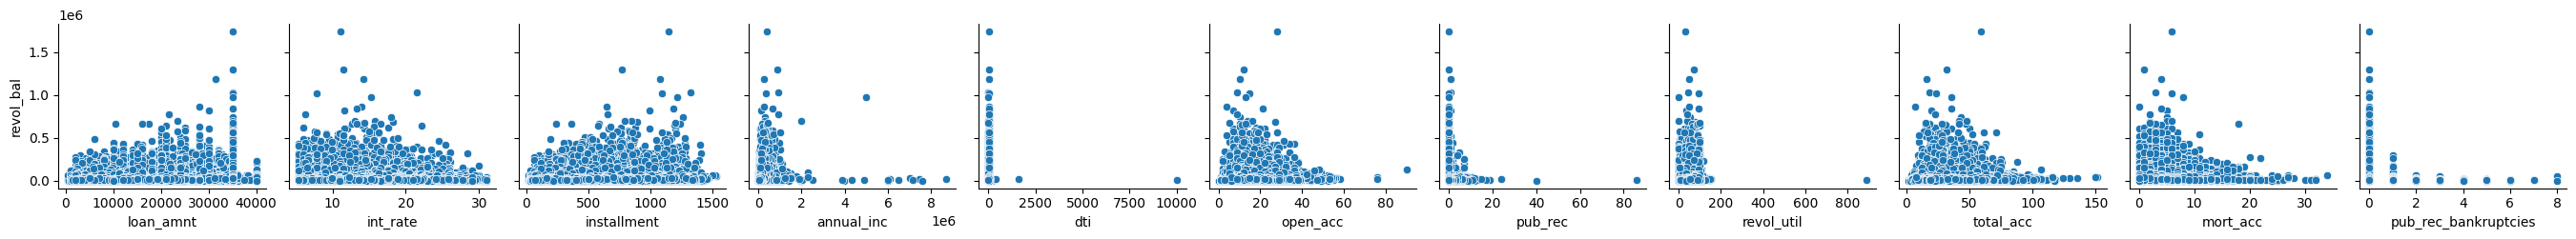

In [534]:
cols=df.select_dtypes(include='number').columns.values
cols=cols[(cols!='issue_month')&(cols!='issue_year') & (cols!='revol_bal')]
sns.pairplot(data=df,y_vars=['revol_bal'],x_vars=cols)

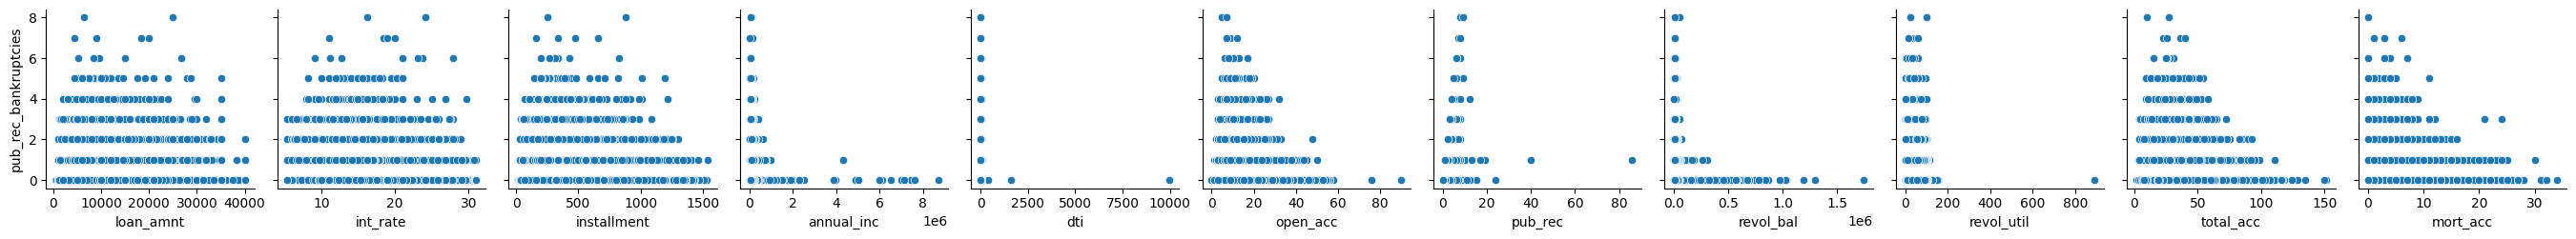

In [535]:
cols=df.select_dtypes(include='number').columns.values
cols=cols[(cols!='issue_month')&(cols!='issue_year') & (cols!='pub_rec_bankruptcies')]
sns.pairplot(data=df,y_vars=['pub_rec_bankruptcies'],x_vars=cols)

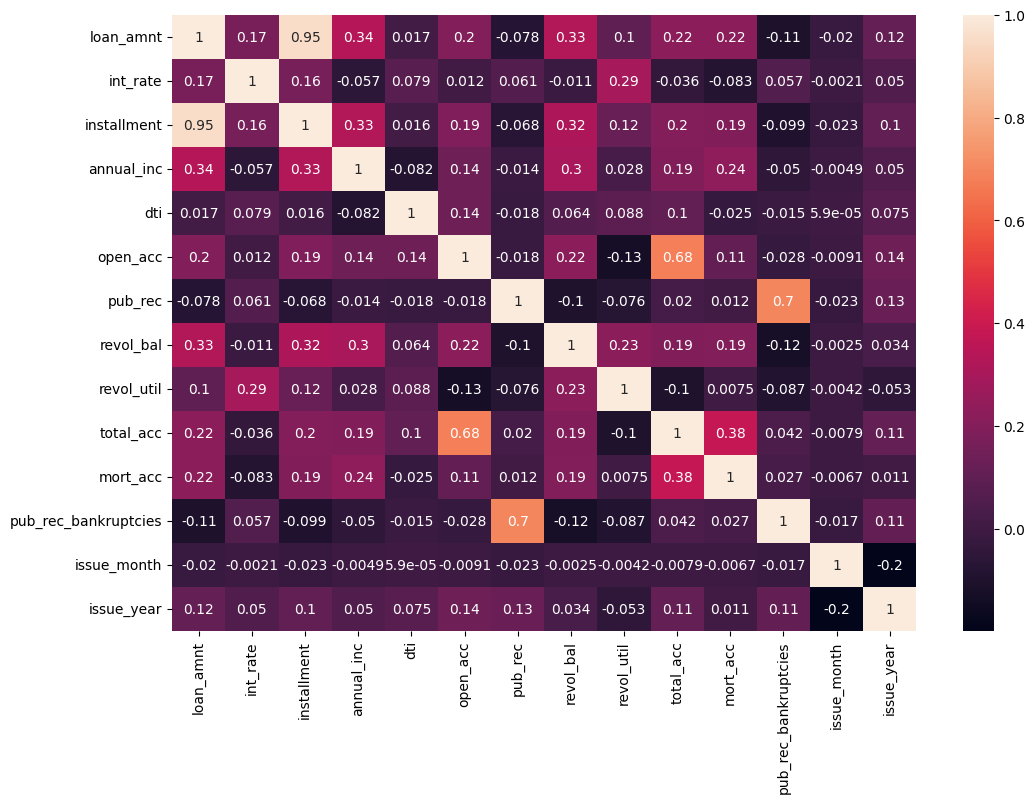

In [536]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

**Insight:**
1. Following features are highly postively correlated with each other
        loan amnt & installment
        pub rec & pub rec bankrupt

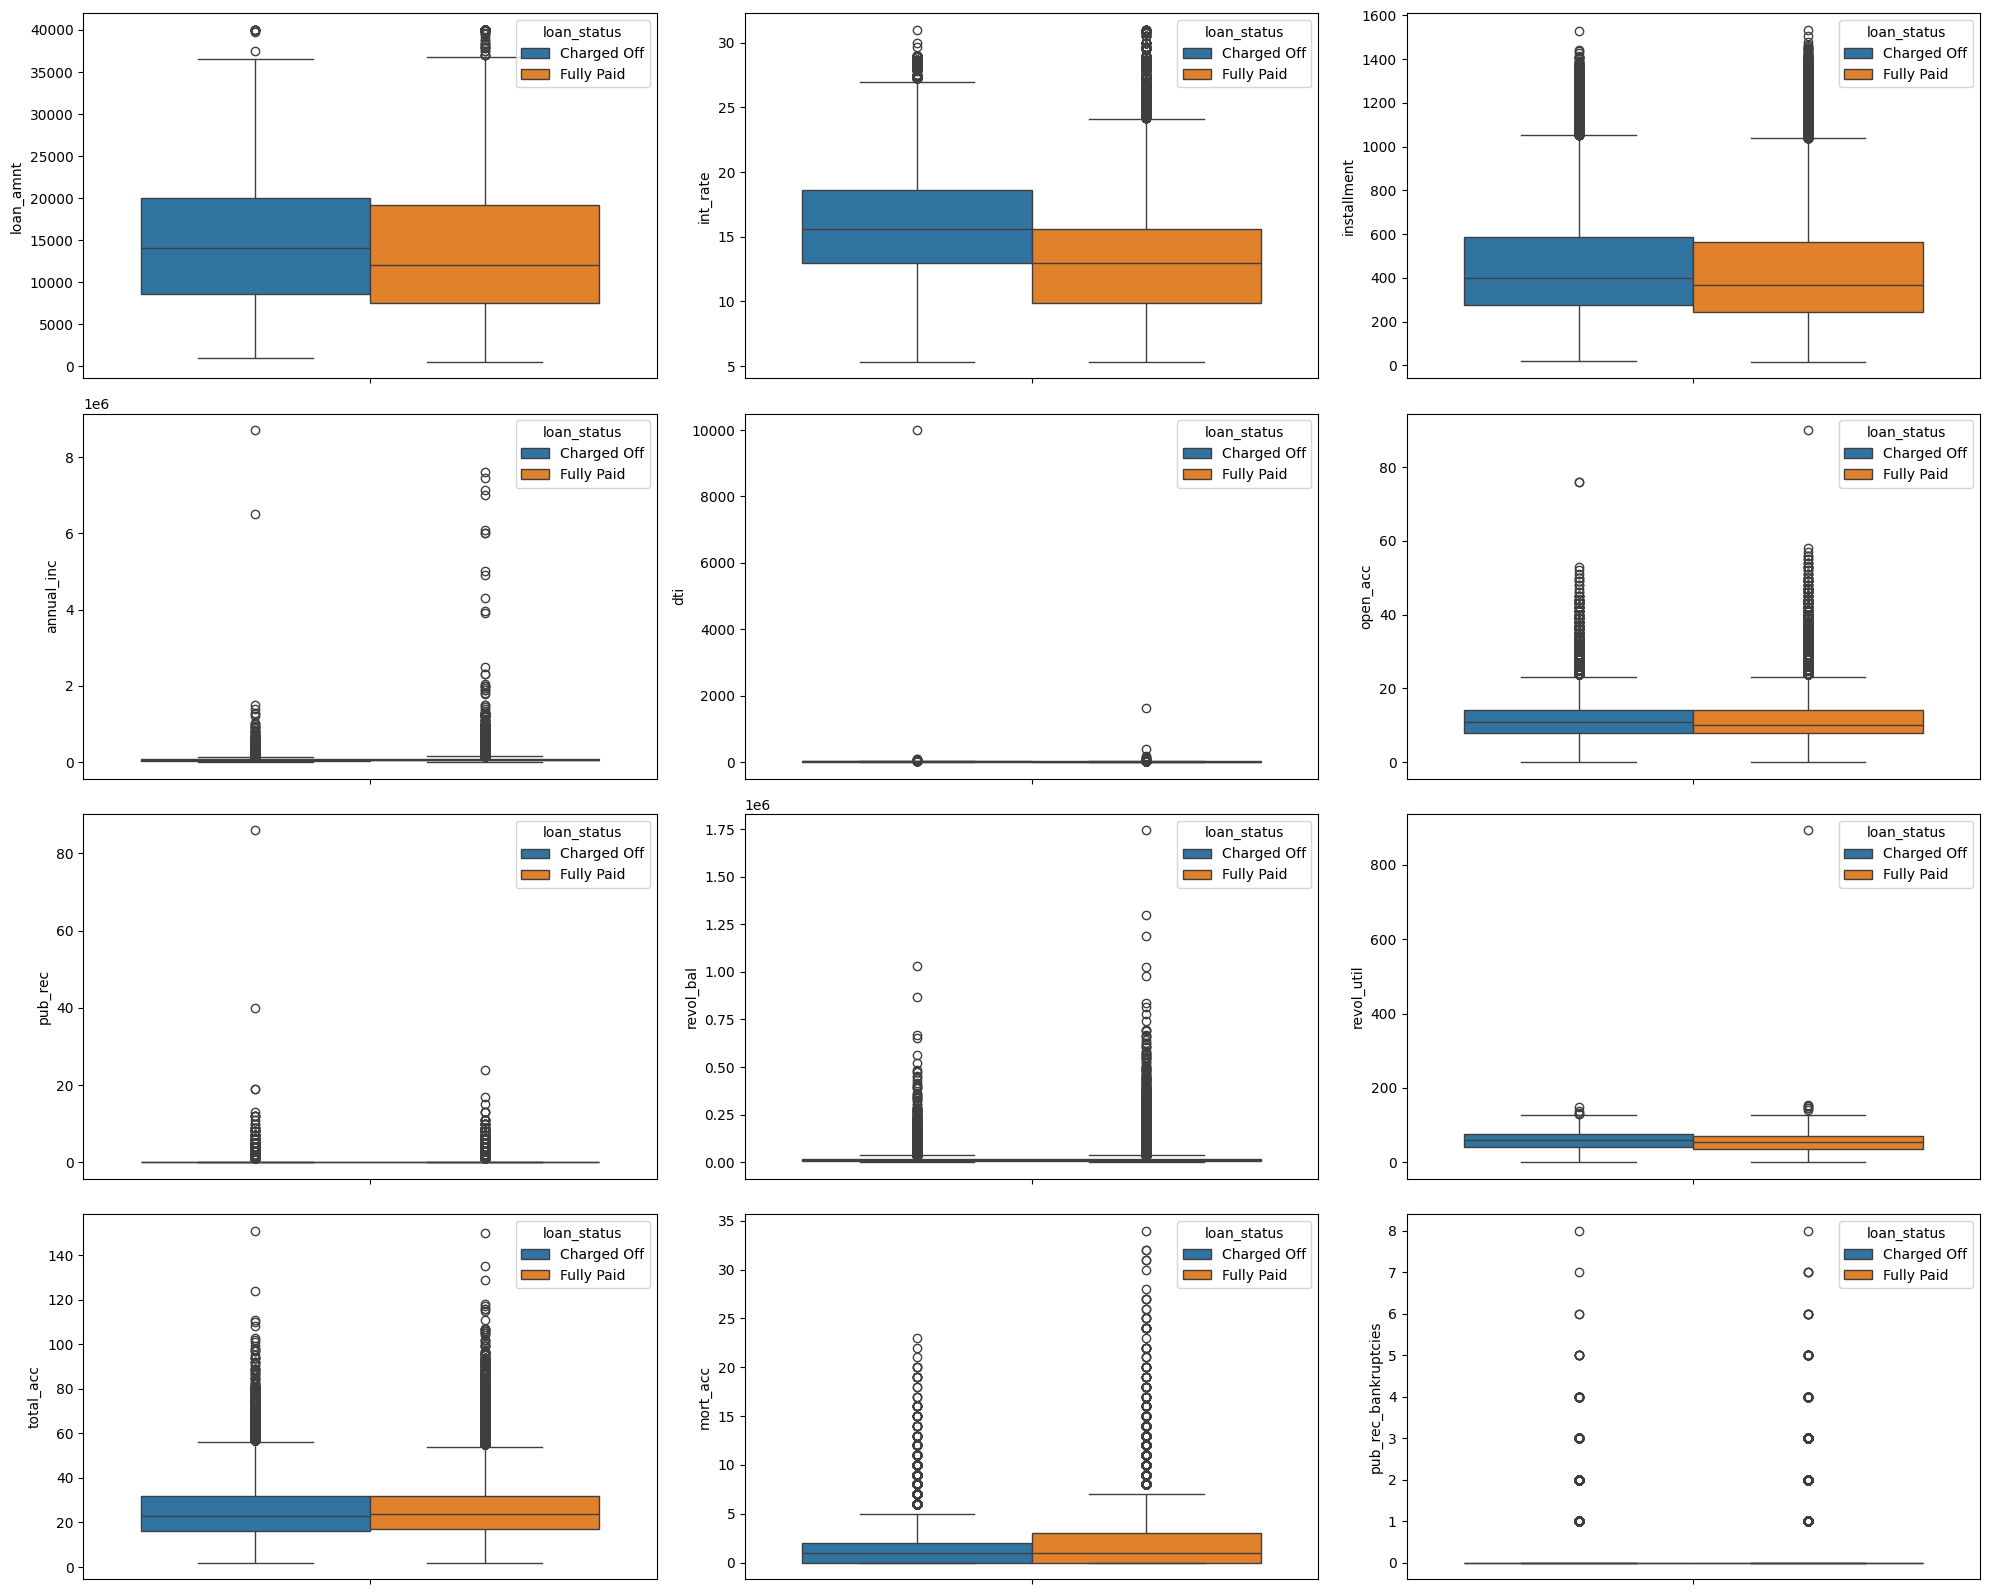

In [537]:
plt.figure(figsize=(20,20))
nrows = (df.select_dtypes(include='number').shape[1]-2)//3+1
ncols=3
k=1
for i in df.select_dtypes(include='number').columns.values:
    if i not in ('issue_month','issue_year'):
        plt.subplot(nrows,ncols,k)
        sns.boxplot(data=df,y=i,hue='loan_status')
        k=k+1
plt.tight_layout()
plt.show()

**Insight:**

1. we will drop installment and choose loan amnt as there is less no of outliers in it.
2. we will drop pub_rec and choose pub_rec_bankruptcies as there is less no of outliers

# **Data Preprocessing**

In [538]:
# Getting series of all columns with their null values
res = df.isna().sum()
res = res[res>0]
res

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dti_flag                  313
dtype: int64

In [539]:
for i in df.columns:
    if df[i].dtype=='category' or df[i].dtype=='object' and i!='title':
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        if i!='title':
            df[i]=df[i].fillna(df[i].median())

In [540]:
df['title']=df['title'].fillna(df['purpose'])

In [541]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
state                   0
zip_code                0
city                    0
issue_month             0
issue_year              0
annual_inc_flag         0
dti_flag                0
dtype: int64

In [542]:
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].apply(lambda x:1 if x>0 else 0).astype('category')
df['mort_acc']=df['mort_acc'].apply(lambda x:1 if x>0 else 0).astype('category')
df['pub_rec']=df['pub_rec'].apply(lambda x:1 if x>0 else 0).astype('category')

<Axes: xlabel='mort_acc', ylabel='percent'>

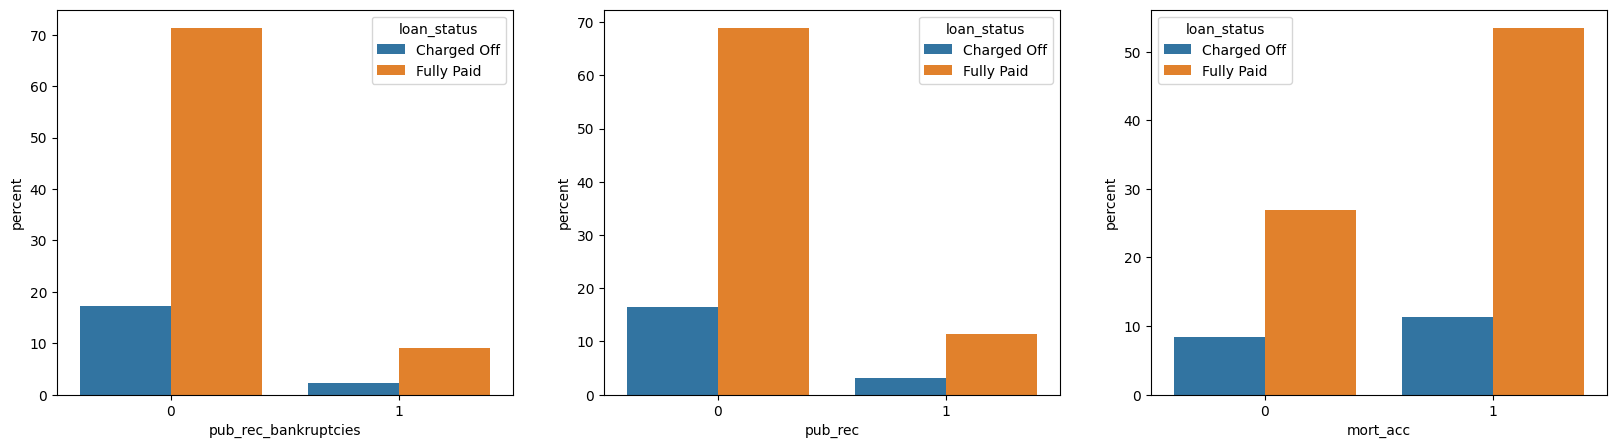

In [543]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(data=df,x='pub_rec_bankruptcies',hue='loan_status',stat='percent')
plt.subplot(1,3,2)
sns.countplot(data=df,x='pub_rec',hue='loan_status',stat='percent')
plt.subplot(1,3,3)
sns.countplot(data=df,x='mort_acc',hue='loan_status',stat='percent')

In [544]:
df['emp_length']=df['emp_length'].map({'10+ years':10,'2 years':2,'< 1 year':0.5,'3 years':3,'1 year':1,'4 years':4,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9}).astype('category')
df['term']=df['term'].map({' 36 months':36,' 60 months':60}).astype('category')
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1}).astype('category')

**Outlier Detection And treatment**

In [545]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code,city,issue_month,issue_year,annual_inc_flag,dti_flag
0,10000.0,36,11.44,329.48,B,B4,marketing,10.0,RENT,117000.0,Not Verified,2015-01-01,0,vacation,vacation,26.24,1990-06-01,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 michelle gateway\r\nmendozaberg, ok 22690",ok,22690,mendozaberg,1,2015,101k-125k,20-30
1,8000.0,36,11.99,265.68,B,B5,credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 carney fort apt. 347\r\nloganmouth, sd 05113",sd,05113,loganmouth,1,2015,51k-75k,20-30
2,15600.0,36,10.49,506.97,B,B3,statistician,0.5,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 mark dale apt. 269\r\nnew sabrina, wv 05113",wv,05113,new sabrina,1,2015,26-50k,10-20
3,7200.0,36,6.49,220.65,A,A2,client advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 reid ford\r\ndelacruzside, ma 00813",ma,00813,delacruzside,11,2014,51k-75k,0-10
4,24375.0,60,17.27,609.33,C,C5,destiny management inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 luna roads\r\ngreggshire, va 11650",va,11650,greggshire,4,2013,51k-75k,30-40


In [546]:
nrows = df.select_dtypes(include='number').columns.values
nrows

array(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'issue_month',
       'issue_year'], dtype=object)

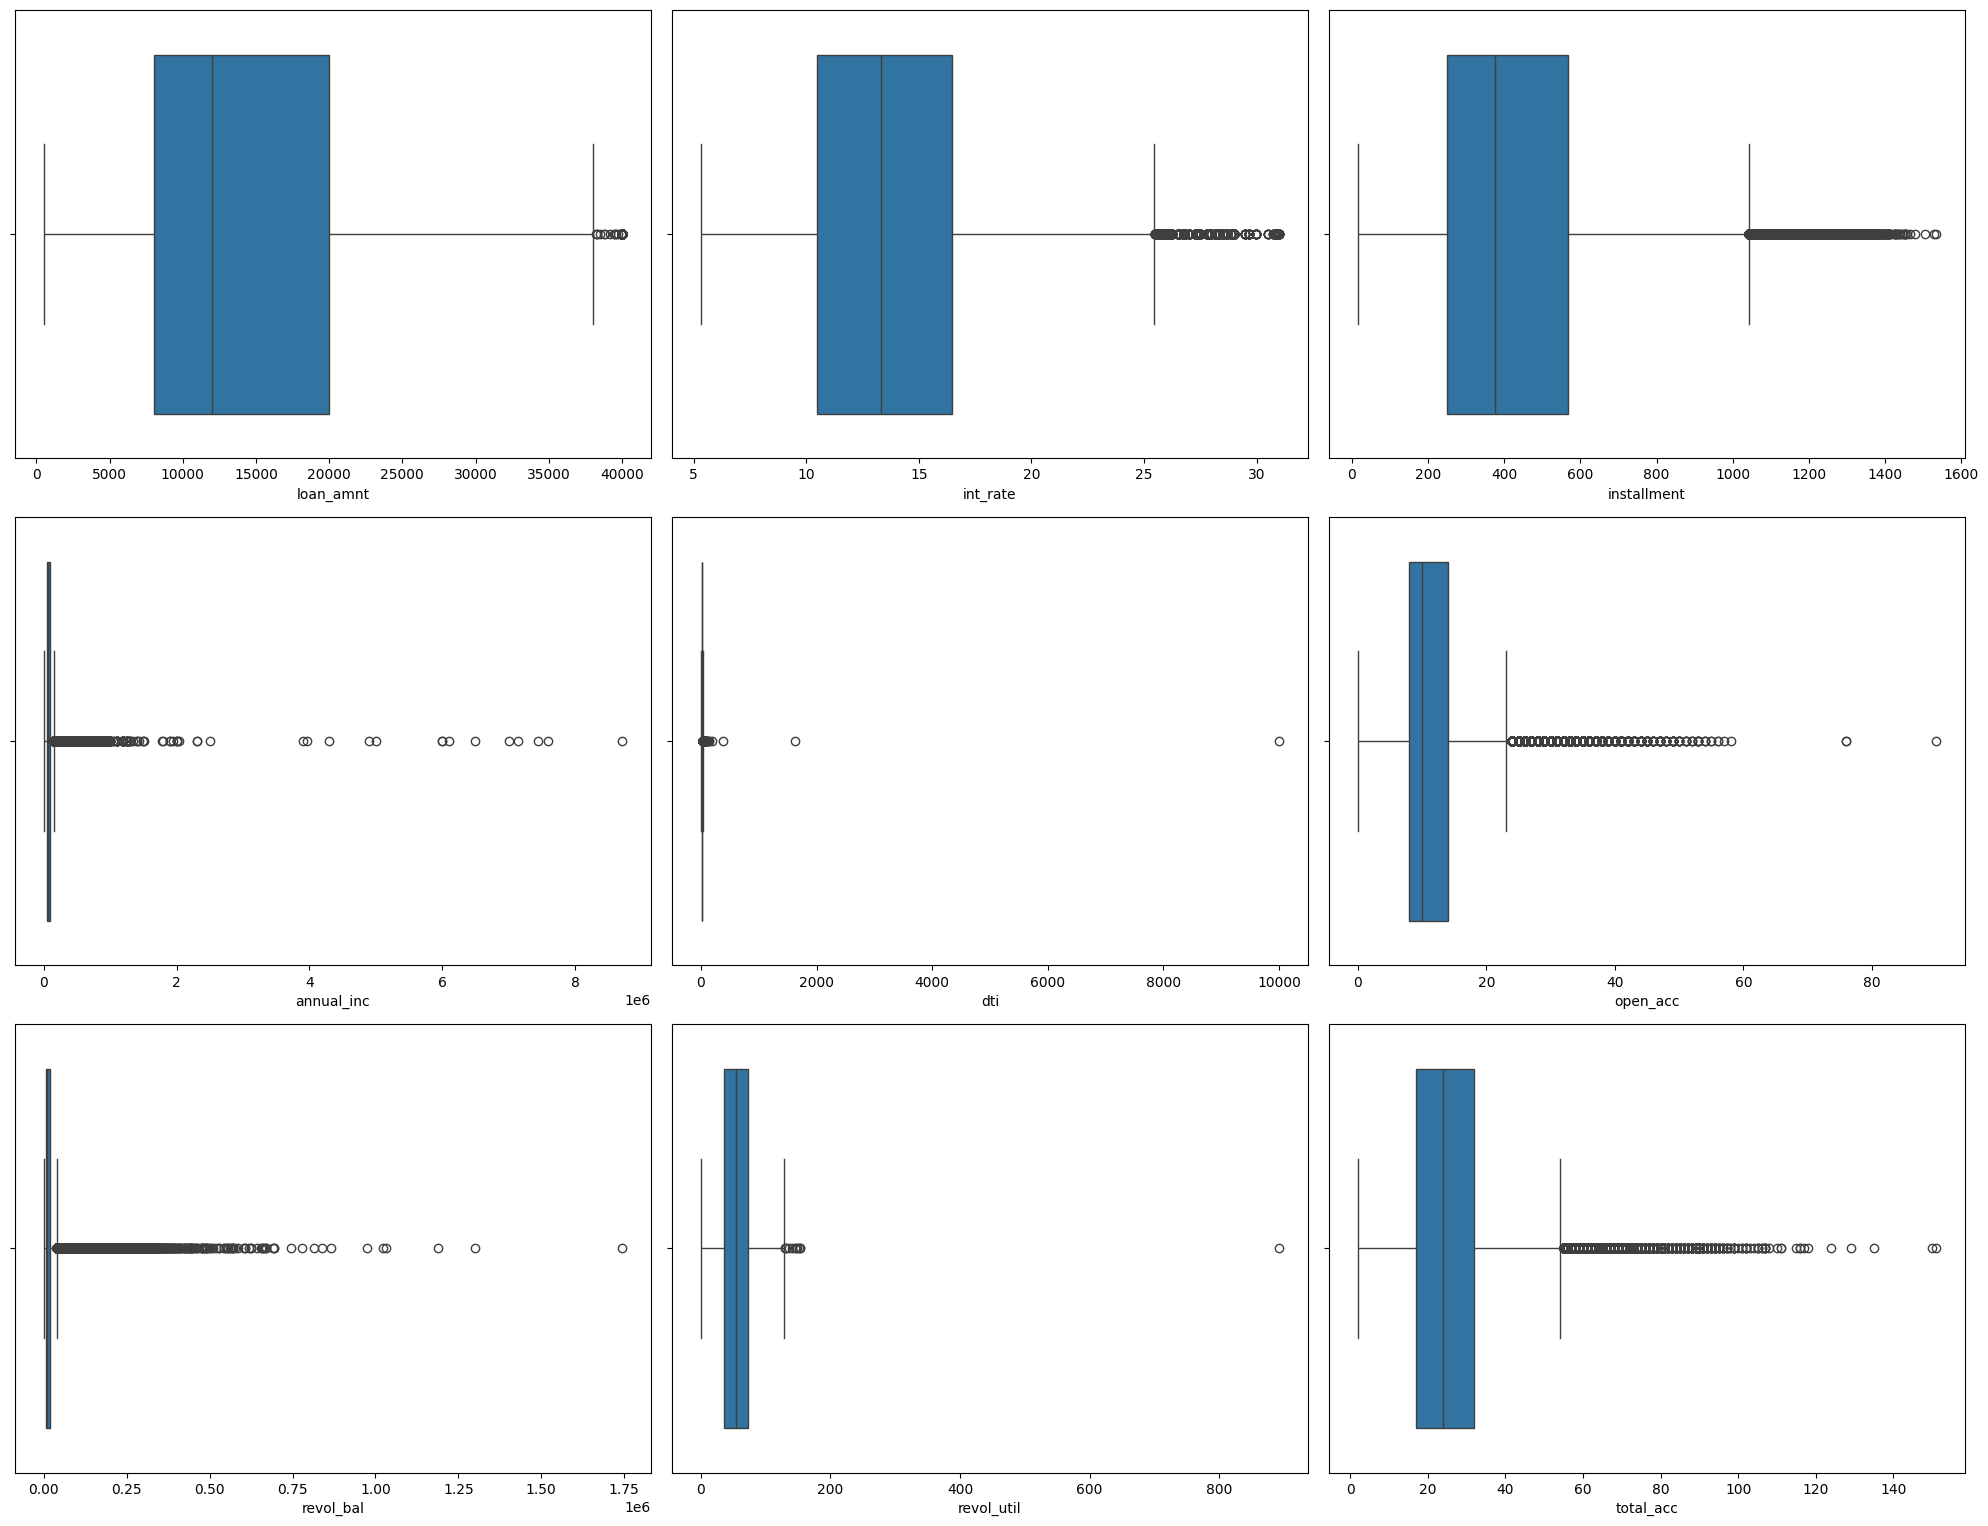

In [547]:
plt.figure(figsize=(20,20))
nrows = (df.select_dtypes(include='number').shape[1]-2)//3+1
ncols=3
k=1
for i in df.select_dtypes(include='number').columns.values:
    if i not in ('issue_month','issue_year'):
        plt.subplot(nrows,ncols,k)
        sns.boxplot(data=df,x=i)
        k=k+1
plt.tight_layout()
plt.show()

**Insight:**
1. Huge no of outliers
2. And there multiple columns with outliers so we will remove the outliers

In [548]:
# # Outliers Capping
# import scipy.stats as stats
# for i in df.select_dtypes(include='number').columns.values:
#     if i not in  ('issue_month','issue_year'):
#         iqr = stats.iqr(df[i])
#         upper_limit=np.percentile(df[i],75)+1.5*iqr
#         lower_limit=np.percentile(df[i],25)-1.5*iqr
#         df[i]=np.clip(df[i],lower_limit,upper_limit)
# df.shape

In [549]:
# outlier removal using iqr limits
import scipy.stats as stats
for i in df.select_dtypes(include='number').columns.values:
    if i not in  ('issue_month','issue_year'):
        iqr = stats.iqr(df[i])
        upper_limit=np.percentile(df[i],75)+1.5*iqr
        lower_limit=np.percentile(df[i],25)-1.5*iqr
        df=df[(df[i]>lower_limit) & (df[i]<upper_limit)]
df.shape

(327586, 34)

In [550]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code,city,issue_month,issue_year,annual_inc_flag,dti_flag
1,8000.0,36,11.99,265.68,B,B5,credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 carney fort apt. 347\r\nloganmouth, sd 05113",sd,05113,loganmouth,1,2015,51k-75k,20-30
2,15600.0,36,10.49,506.97,B,B3,statistician,0.5,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 mark dale apt. 269\r\nnew sabrina, wv 05113",wv,05113,new sabrina,1,2015,26-50k,10-20
3,7200.0,36,6.49,220.65,A,A2,client advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 reid ford\r\ndelacruzside, ma 00813",ma,00813,delacruzside,11,2014,51k-75k,0-10
4,24375.0,60,17.27,609.33,C,C5,destiny management inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 luna roads\r\ngreggshire, va 11650",va,11650,greggshire,4,2013,51k-75k,30-40
5,20000.0,36,13.33,677.07,C,C3,hr specialist,10.0,MORTGAGE,86788.0,Verified,2015-09-01,0,debt_consolidation,debt consolidation,16.31,2005-01-01,8.0,0,25757.0,100.6,23.0,f,INDIVIDUAL,1,0,1726 cooper passage suite 129\r\nnorth deniseb...,de,30723,north deniseberg,9,2015,76k-100k,10-20


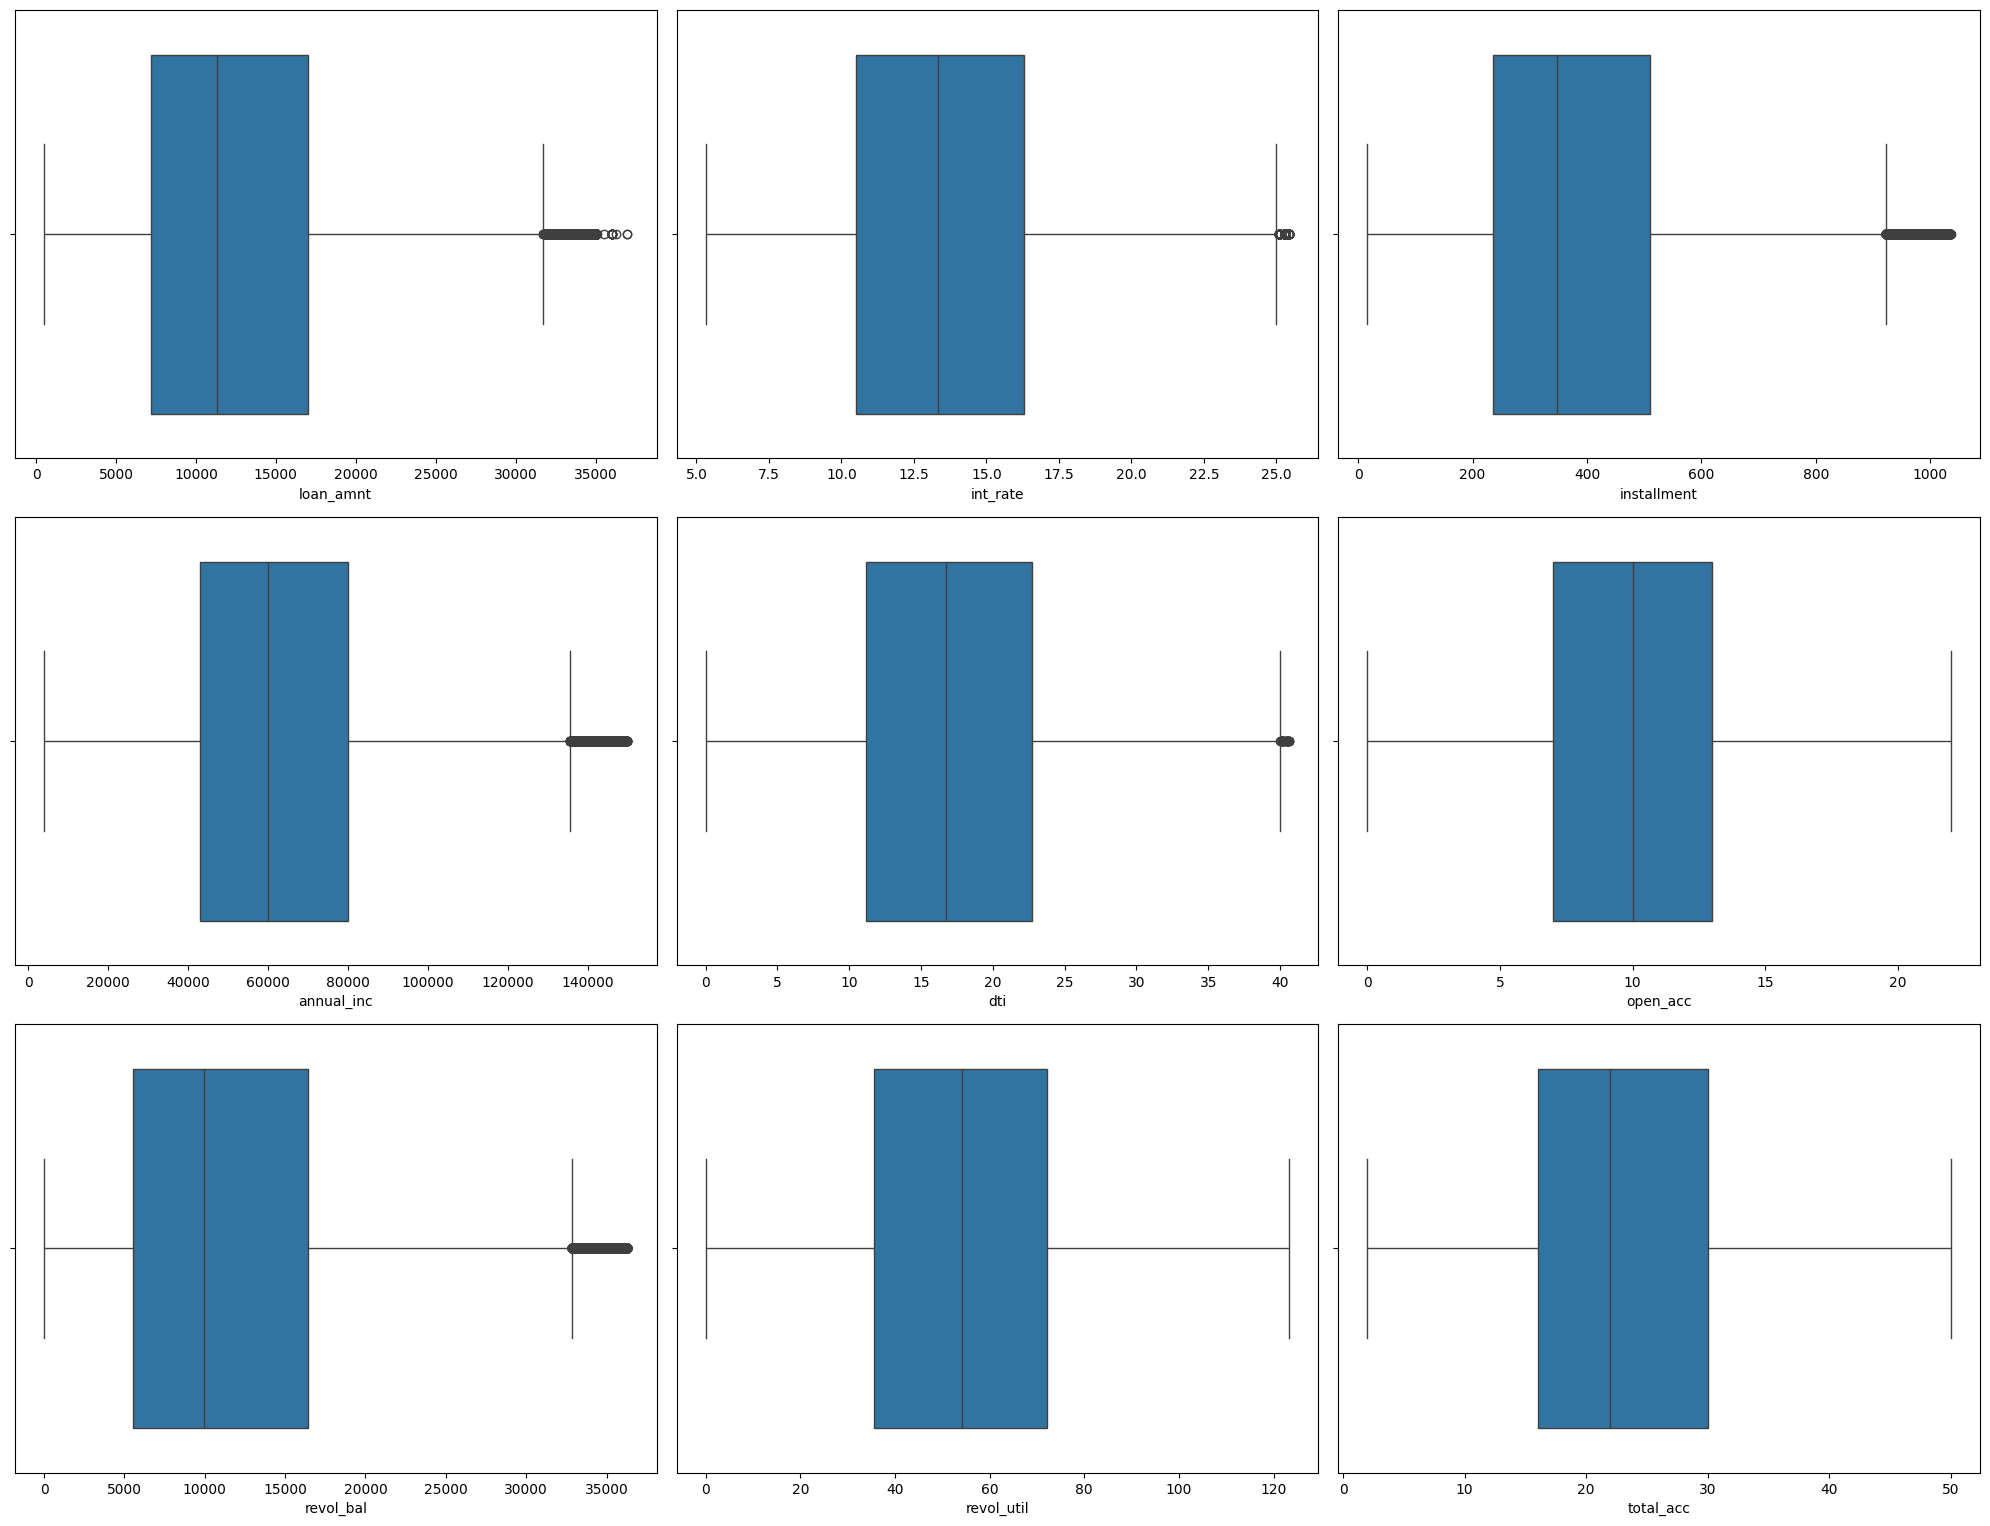

In [551]:
plt.figure(figsize=(20,20))
nrows = (df.select_dtypes(include='number').shape[1]-2)//3+1
ncols=3
k=1
for i in df.select_dtypes(include='number').columns.values:
    if i not in ('issue_month','issue_year'):
        plt.subplot(nrows,ncols,k)
        sns.boxplot(data=df,x=i)
        k=k+1
plt.tight_layout()
plt.show()

In [552]:
(396030-327586)/396030*100

17.282529101330706

**Insight:**
1. 17% of data is lost after outliers removal but data now looks better

In [553]:
modeldf = df.copy()

In [554]:
modeldf.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,state,zip_code,city,issue_month,issue_year,annual_inc_flag,dti_flag
1,8000.0,36,11.99,265.68,B,B5,credit analyst,4.0,MORTGAGE,65000.0,Not Verified,2015-01-01,0,debt_consolidation,debt consolidation,22.05,2004-07-01,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 carney fort apt. 347\r\nloganmouth, sd 05113",sd,05113,loganmouth,1,2015,51k-75k,20-30
2,15600.0,36,10.49,506.97,B,B3,statistician,0.5,RENT,43057.0,Source Verified,2015-01-01,0,credit_card,credit card refinancing,12.79,2007-08-01,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 mark dale apt. 269\r\nnew sabrina, wv 05113",wv,05113,new sabrina,1,2015,26-50k,10-20
3,7200.0,36,6.49,220.65,A,A2,client advocate,6.0,RENT,54000.0,Not Verified,2014-11-01,0,credit_card,credit card refinancing,2.60,2006-09-01,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 reid ford\r\ndelacruzside, ma 00813",ma,00813,delacruzside,11,2014,51k-75k,0-10
4,24375.0,60,17.27,609.33,C,C5,destiny management inc.,9.0,MORTGAGE,55000.0,Verified,2013-04-01,1,credit_card,credit card refinance,33.95,1999-03-01,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 luna roads\r\ngreggshire, va 11650",va,11650,greggshire,4,2013,51k-75k,30-40
5,20000.0,36,13.33,677.07,C,C3,hr specialist,10.0,MORTGAGE,86788.0,Verified,2015-09-01,0,debt_consolidation,debt consolidation,16.31,2005-01-01,8.0,0,25757.0,100.6,23.0,f,INDIVIDUAL,1,0,1726 cooper passage suite 129\r\nnorth deniseb...,de,30723,north deniseberg,9,2015,76k-100k,10-20


In [555]:
modeldf.drop(columns=['installment','emp_title','issue_d','issue_year','issue_month','address',
                      'title','earliest_cr_line','zip_code','state','verification_status','application_type','city','pub_rec','annual_inc_flag','dti_flag'],inplace=True)

In [556]:
modeldf.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies
1,8000.0,36,11.99,B,B5,4.0,MORTGAGE,65000.0,0,debt_consolidation,22.05,17.0,20131.0,53.3,27.0,f,1,0
2,15600.0,36,10.49,B,B3,0.5,RENT,43057.0,0,credit_card,12.79,13.0,11987.0,92.2,26.0,f,0,0
3,7200.0,36,6.49,A,A2,6.0,RENT,54000.0,0,credit_card,2.60,6.0,5472.0,21.5,13.0,f,0,0
4,24375.0,60,17.27,C,C5,9.0,MORTGAGE,55000.0,1,credit_card,33.95,13.0,24584.0,69.8,43.0,f,1,0
5,20000.0,36,13.33,C,C3,10.0,MORTGAGE,86788.0,0,debt_consolidation,16.31,8.0,25757.0,100.6,23.0,f,1,0


In [557]:
modeldf.describe(include='category')

,term,grade,sub_grade,emp_length,home_ownership,loan_status,purpose,initial_list_status,mort_acc,pub_rec_bankruptcies
count,327586,327586,327586,327586.0,327586,327586,327586,327586,327586,327586
unique,2,7,35,11.0,5,2,14,2,2,2
top,36,B,B3,10.0,MORTGAGE,0,debt_consolidation,f,1,0
freq,254434,98938,22789,115841.0,153864,263333,194832,200308,201597,287229


In [558]:
modeldf.describe()

,loan_amnt,int_rate,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc
count,327586.000000,327586.000000,327586.000000,327586.000000,327586.000000,327586.000000,327586.000000,327586.000000
mean,12700.311979,13.520052,63154.326021,17.169291,10.436984,11782.336357,53.304569,23.265109
std,7207.063895,4.268123,27009.353873,8.020333,4.136453,8139.471161,24.252041,9.887439
min,500.000000,5.320000,4000.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,7200.000000,10.490000,43000.000000,11.200000,7.000000,5523.000000,35.500000,16.000000
50%,11350.000000,13.330000,60000.000000,16.720000,10.000000,9960.000000,54.200000,22.000000
75%,17000.000000,16.290000,80000.000000,22.720000,13.000000,16449.000000,72.100000,30.000000
max,37000.000000,25.440000,149900.000000,40.640000,22.000000,36300.000000,123.300000,50.000000


In [559]:
modeldf['loan_status']=modeldf['loan_status'].astype('int')

In [560]:
# Target Encoding Categorical Variables
for i in modeldf.select_dtypes(include='category').columns.values:
    modeldf[i]=modeldf.groupby(i)['loan_status'].transform('mean')
modeldf.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,dti,open_acc,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies
1,8000.0,0.159574,11.99,0.127575,0.156464,0.189981,0.170261,65000.0,0,0.207132,22.05,17.0,20131.0,53.3,27.0,0.192758,0.173827,0.195308
2,15600.0,0.159574,10.49,0.127575,0.126859,0.205764,0.222247,43057.0,0,0.169135,12.79,13.0,11987.0,92.2,26.0,0.192758,0.231846,0.195308
3,7200.0,0.159574,6.49,0.063870,0.047656,0.189217,0.222247,54000.0,0,0.169135,2.60,6.0,5472.0,21.5,13.0,0.192758,0.231846,0.195308
4,24375.0,0.323327,17.27,0.215727,0.250312,0.200661,0.170261,55000.0,1,0.169135,33.95,13.0,24584.0,69.8,43.0,0.192758,0.173827,0.195308
5,20000.0,0.159574,13.33,0.215727,0.223186,0.197935,0.170261,86788.0,0,0.207132,16.31,8.0,25757.0,100.6,23.0,0.192758,0.173827,0.195308


# **Model Building**

In [561]:
y = modeldf['loan_status']
X = modeldf.drop(columns=['loan_status'])
X.shape

(327586, 17)

In [562]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(196551, 17)

In [563]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [564]:
y_train.value_counts()

loan_status
0    157978
1     38573
Name: count, dtype: int64

In [565]:
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
def all_metrics(y_test,y_pred):
    print('Precision Score : ',round(precision_score(y_test, y_pred)*100,2))
    print('Recall Score : ',round(recall_score(y_test, y_pred)*100,2))
    print('F1 Score : ',round(f1_score(y_test, y_pred)*100,2))

In [566]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Before Smote: \n')
print('Model Accuracy:',round(model.score(X_test,y_test)*100),2)
all_metrics(y_test,y_pred)
print()

# Balancing the imbalanced data
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train,y_train)
print(y_train.value_counts())
print()

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('After Smote: \n')
print('Model Accuracy:',round(model.score(X_test,y_test)*100),2)
all_metrics(y_test,y_pred)

Before Smote: 

Model Accuracy: 81 2
Precision Score :  52.37
Recall Score :  7.51
F1 Score :  13.13

loan_status
1    157978
0    157978
Name: count, dtype: int64

After Smote: 

Model Accuracy: 66 2
Precision Score :  31.39
Recall Score :  63.61
F1 Score :  42.03


Insight:
1. After smote oversampling the f1 score and recall score increased drastically thus indicating oversampling is working

**Hyperparameter Tuning**

In [567]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 2000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

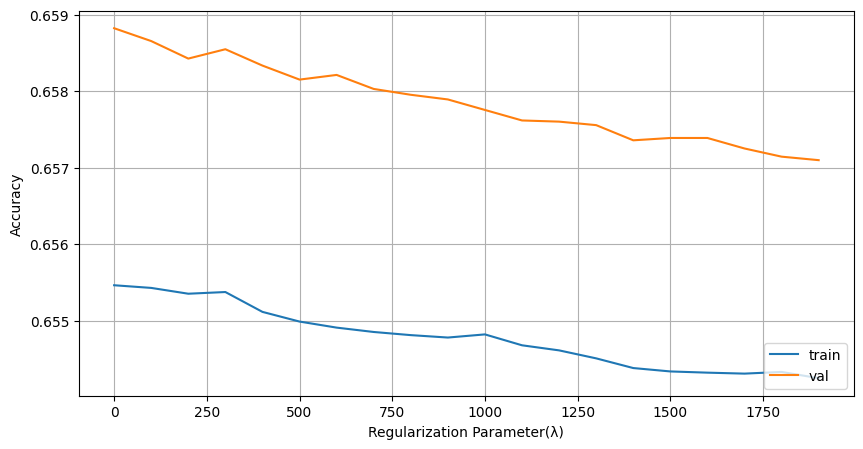

In [568]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 2000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 2000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [569]:
li = np.arange(0.01, 2000.0, 100)
ind = np.argmax(np.array(val_scores))
lambdaa = li[ind]
lambdaa

0.01

Choosing lambda as 0.01 with high validation and high training data scores

In [570]:
model = LogisticRegression(C=1/0.01)
model.fit(X_train, y_train)

LogisticRegression(C=100.0)

In [571]:
print('After Hyperparamerter Tuning :\n ')
y_pred = model.predict(X_test)
print('Model Accuracy:',model.score(X_test,y_test)*100)
all_metrics(y_test,y_pred)

After Hyperparamerter Tuning :
 
Model Accuracy: 65.69034463811472
Precision Score :  31.39
Recall Score :  63.61
F1 Score :  42.03


**Insight:**
1. Not much difference after hyperparameter tuning

In [572]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix # 2D np array

array([[34889, 17816],
       [ 4663,  8150]])


        Fully Paid: 0
        Charged OFF : 1

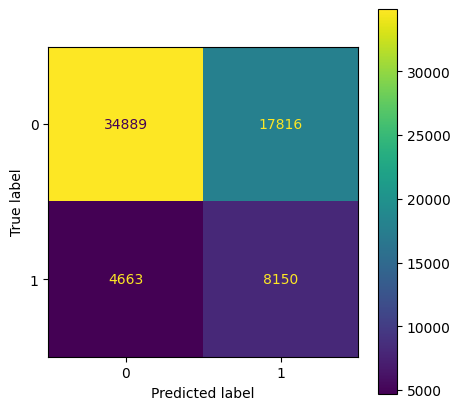

In [573]:
# ax used here to control the size of confusion matrix
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_matrix).plot(ax = ax)

In [574]:
res = pd.DataFrame(X.columns)
res['coef'] = model.coef_[0]
res = res.sort_values(by='coef',ascending=False).reset_index(drop=True)
res.rename(columns={0:'features'},inplace=True)

In [575]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.66      0.76     52705
           1       0.31      0.64      0.42     12813

    accuracy                           0.66     65518
   macro avg       0.60      0.65      0.59     65518
weighted avg       0.77      0.66      0.69     65518



In [576]:
all_metrics(y_test,y_pred)

Precision Score :  31.39
Recall Score :  63.61
F1 Score :  42.03


**Insight:**
1. We notice that the recall score is notably high, indicating our model can identify 63% of actual defaulters. However, the precision for the positive class is low; only 31% of the predicted defaulters are actual defaulters.

2. While this model effectively identifies a significant portion of defaulters, it risks denying loans to deserving customers due to the high rate of false positives.

3. Furthermore, the low precision contributes to a decrease in the F1 score to 42%, despite the accuracy being 65%.

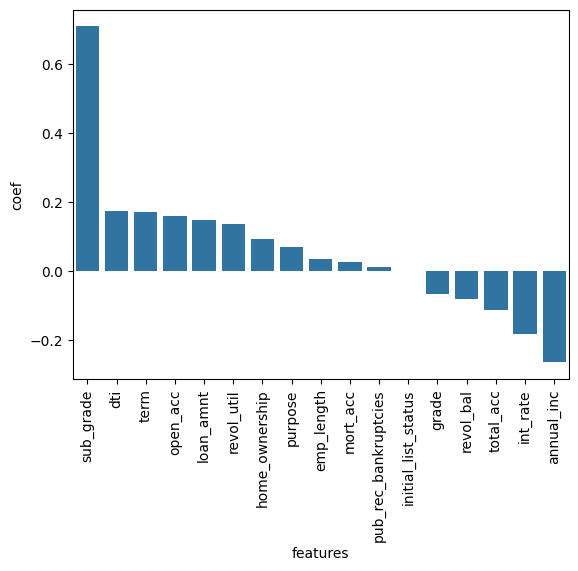

In [577]:
sns.barplot(data=res,x='features',y='coef')
plt.xticks(rotation=90)
plt.show()

Insight:
1. Positively correlated important features in deciding whether person will be defaulter or not are
        sub_grade, dti,term, open_acc, loan_amnt
2. Negatively Correlated important features in deciding whether person will be defaulter or not are
         annual_inc, int_rate, total_acc

In [578]:
from sklearn.metrics import roc_curve, roc_auc_score
probability = model.predict_proba(X_test)
probabilites = probability[:,1]

In [579]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

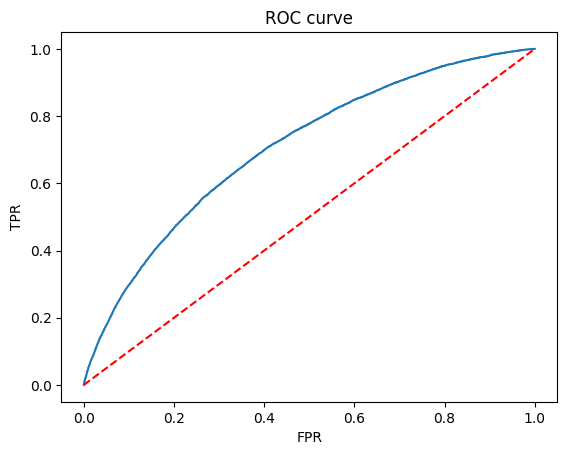

In [580]:
plt.plot(fpr,tpr)

#random model
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [581]:
# AUC
roc_auc_score(y_test,probabilites)

0.7055251767536725

In [582]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [583]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

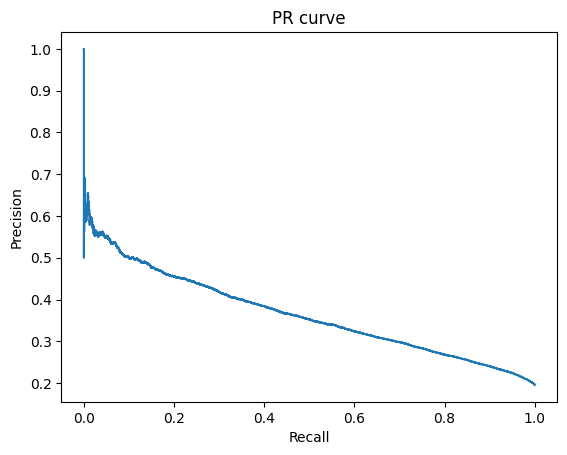

In [584]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [585]:
auc(recall, precision)

0.36445396022482535

**Insight:**

1. AUC of 0.70 indicates that the model effectively distinguishes between the positive and negative classes.

2. The area under the precision-recall curve (AUC-PR) is not as high as desired. While it exceeds the benchmark of 0.36 for a random model, indicating some level of effectiveness.





<!-- Q1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

Ans: The precision score serves as an indicator of Type I error. By increasing the precision score of the model, we can minimize false positives. This ensures that the company avoids erroneously denying loans to deserving individuals, thus maximizing the opportunity to finance worthy applicants.

Q2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone.

Ans: The recall score serves as an indicator of how effectively the model identifies actual defaulters. By increasing the recall score, we can minimize false negatives (Type II error), thereby ensuring that loans are not disbursed to defaulters, thus enhancing the model's ability to identify risky applicants. -->

<!-- 1. What percentage of customers have fully paid their Loan Amount?
        Ans- 80% of customers have fullyy paid their loan amount
2. Comment about the correlation between Loan Amount and Installment features.
        Ans - Loan Amount and Installment are highly positively correlated with value of 0.95

3. The majority of people have home ownership as
        MORTGAGE - 50%
        RENT     - 40%.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
        Ans - F, 'B' are more likely to fully pay their
5. Name the top 2 afforded job titles.
6. Thinking from a bank's perspective, which metric should our primary focus be
on..
c. Visual
Representations

Visuals can often convey
information more effectively
than numbers alone.

Utilize well-labeled charts,
plots, and graphs (like ROC
AUC curve and Precision
recall curve) to visualize and
emphasize key insights

d. Trade-off Analysis Business decisions often
involve trade-offs. It's crucial
to understand the balance
between risk (false positives)
and opportunity (financing
more individuals).

Highlight the implications of
false positives and false
negatives. Discuss strategies
to strike a balance, such as
adjusting the classification
threshold.

e. Recommendations End with actionable
recommendations derived
from your analysis

Recommend strategies to
improve loan approval
processes, mitigate risks, or
capitalize on opportunities.
Support these
recommendations with
evidence from your analysis.

f. Feedback Loop Continuous improvement is

key in analytics.

Propose methods for
continuously monitoring the
model's performance over
time and iterating based on
new data or changing
business needs.

1. ROC AUC
2. Precision
3. Recall
4. F1 Score

7. How does the gap in precision and recall affect the bank?
8. Which were the features that heavily affected the outcome?
9. Will the results be affected by geographical location? (Yes/No) -->


1. What percentage of customers have fully paid their Loan Amount?
        Answer: 80% of customers have fully paid their loan amount.

2. Comment about the correlation between Loan Amount and Installment features.
        Answer: Loan Amount and Installment are highly positively correlated with a value of 0.95.

3. The majority of people have home ownership as _______.
        Answer: MORTGAGE - 50% and RENT - 40%.

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
        Answer: False, people with grades 'B' are more likely to fully pay their loan.

6. Thinking from a bank's perspective, which metric should our primary focus be on?
        Answer: The bank should focus on a combination of metrics, including ROC AUC, Precision, Recall, and F1 Score. These metrics provide a comprehensive view of the model's performance and help in understanding the trade-off between risk and opportunity.

7. How does the gap in precision and recall affect the bank?
        Answer: The gap in precision and recall affects the bank by increasing the risk of false positives and false negatives. False positives occur when the model predicts a customer will default when they actually won't, resulting in lost business opportunities. False negatives occur when the model predicts a customer will not default when they actually will, leading to financial losses for the bank.

8. Which were the features that heavily affected the outcome?
        Answer: The features that heavily affected the outcome were sub_grade, dti, term, open_acc, and loan_amnt. These features had the highest coefficients in the logistic regression model, indicating their strong influence on the prediction of loan default.

9. Will the results be affected by geographical location? (Yes/No)
        Answer: Yes, the results may be affected by geographical location. Different geographical regions may have varying economic conditions, demographics, and lending practices, which could influence the likelihood of loan default.
